# Proyecto: Análisis de rendimiento de campañas de marketing.

##### Jorge Duro Sánchez

En este proyecto vamos a analizar el **"Marketing Campaign Performance"**, que contiene información detallada sobre el rendimiento de diversas campañas de marketing llevadas a cabo por una empresa en Malasia. El objetivo es aplicar técnicas de tratamiento y limpieza de datos, análisis exploratorio y visualización para extraer insights valiosos que puedan mejorar las estrategias de marketing de la empresa.

## Objetivos del Proyecto

- **Comprender y preprocesar el dataset**: Identificar y manejar valores faltantes, inconsistencias y outliers.
- **Realizar un análisis exploratorio de datos (EDA)**: Descubrir patrones y relaciones significativas entre las variables.
- **Visualizar datos**: Crear visualizaciones informativas utilizando Matplotlib, Seaborn y Plotly.
- **Extraer conclusiones**: Interpretar los resultados y proporcionar recomendaciones basadas en el análisis.

## Descripción del Dataset

El dataset incluye las siguientes características:

- **Campaign_ID**: Identificador único de cada campaña.
- **Channel**: Canal de marketing utilizado (e.g., Social Media, Email, TV, News, Radio, Billboard).
- **Product_Category**: Categoría del producto (e.g., Electronics, Fashion, Groceries, Automotive, Health).
- **Region**: Región geográfica en Malasia donde se dirigió la campaña (e.g., Kuala Lumpur, Penang, Malacca, Johor, Sabah, Sarawak).
- **Budget**: Presupuesto asignado en Ringgit malayo.
- **Spend**: Gasto real de la campaña en Ringgit malayo.
- **Impressions**: Número de veces que se vio el anuncio.
- **Clicks**: Número de clics que recibió el anuncio.
- **CTR**: Tasa de clics (Click Through Rate).
- **Conversions**: Número de acciones exitosas (e.g., compras, registros).
- **CR**: Tasa de conversión (Conversion Rate).
- **Revenue**: Ingresos generados por la campaña en Ringgit malayo.
- **ROI**: Retorno de la inversión (Revenue dividido por Spend).
- **Duration**: Duración de la campaña en días.
- **Start_Date**: Fecha de inicio de la campaña.
- **End_Date**: Fecha de finalización de la campaña.
- **Customer_Satisfaction**: Calificación de satisfacción del cliente (1 a 5).
- **Campaign_Effectiveness**: Efectividad de la campaña según el equipo de marketing (1 a 10).
- **Market_Segment**: Segmento de mercado objetivo (Low, Medium, High).

### 1. Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.colors as pc

### 2. Cargamos el dataset en un DataFrame de pandas.

In [2]:
df = pd.read_csv('datos.csv')

### 3. Inspección general del DataFrame.

#### 3.1 Visualización del Dataframe.

In [3]:
# 10 primeras filas.
df.head(10)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.00000,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.000000,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.00000,NaN,921078.0,3.78,29.0,NaN,NaN,3.0,7.000000,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.00000,0.0517,51142.0,3.64,74.0,12/4/2023,20/10/2023,1.0,2.000000,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.00000,0.3579,191887.0,2.64,67.0,24/4/2023,26/1/2023,5.0,6.000000,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.00000,0.0544,167241.0,1.02,40.0,10/1/2023,1/1/2023,5.0,6.000000,Low
5,CAM0006,TV,Electronics,Penang,422726.0,NaN,25680.0,16342.0,0.7683,9786.00000,0.3395,480187.0,1.81,174.0,16/8/2023,15/6/2023,5.0,3.000000,Medium
6,NaN,Radio,Automotive,Sarawak,NaN,444126.0,81342.0,35053.0,0.0303,290.00000,0.5596,753564.0,2.69,105.0,21/6/2023,7/7/2023,4.0,7.000000,High
7,CAM0008,Billboard,Groceries,NaN,406954.0,64007.0,180250.0,17104.0,0.7427,8704.00000,0.9349,987174.0,0.39,59.0,13/6/2023,19/10/2023,4.0,44.457475,Low
8,CAM0009,NaN,Electronics,Johor,NaN,71027.0,543474.0,3181.0,0.5424,20614.52929,NaN,318098.0,1.50,358.0,21/6/2023,5/12/2023,3.0,10.000000,High
9,CAM0010,Radio,Automotive,NaN,399568.0,297974.0,319054.0,36693.0,0.1588,3160.00000,0.7760,823506.0,2.32,272.0,22/5/2023,5/11/2023,NaN,9.000000,Medium


In [4]:
# 10 últimas filas.
df.tail(10)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
4990,CAM4991,TV,Automotive,Johor,397926.0,183229.0,442782.000,30473.0,NaN,8950.0,0.7344,778987.0,2.790000,112.0,NaN,11/2/2023,5.0,5.0,High
4991,CAM4992,Social Media,Electronics,Kuala Lumpur,427457.0,NaN,NaN,19437.0,0.0741,NaN,0.1224,702779.0,0.190000,357.0,20/7/2023,21/9/2023,NaN,1.0,High
4992,CAM4993,Email,Electronics,Kuala Lumpur,57375.0,217740.0,297184.000,49435.0,0.2072,8510.0,0.1581,NaN,1.130000,81.0,27/3/2023,18/1/2023,1.0,9.0,Medium
4993,CAM4994,Email,Automotive,Penang,391536.0,46535.0,643245.000,27057.0,0.6560,905.0,0.2410,965884.0,1.290000,195.0,NaN,29/12/2023,5.0,2.0,Low
4994,CAM4995,TV,NaN,Kuala Lumpur,330357.0,233849.0,96761.000,43407.0,0.5625,6183.0,0.9312,76243.0,2.550000,322.0,7/10/2023,24/6/2023,1.0,4.0,Low
4995,CAM4996,Email,Automotive,Kuala Lumpur,373204.0,239182.0,947505.000,27359.0,0.4446,2725.0,0.1643,739721.0,17.287862,170.0,4/4/2023,15/12/2023,4.0,5.0,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,81357.0,381641.0,270685.000,2575.0,0.8224,1555.0,0.2425,324435.0,1.500000,148.0,28/1/2023,26/12/2023,2.0,7.0,Low
4997,CAM4998,Radio,NaN,Kuala Lumpur,216060.0,122475.0,6042568.044,42563.0,0.5894,NaN,NaN,647246.0,NaN,340.0,7/6/2023,6/12/2023,3.0,5.0,NaN
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,120531.0,433558.0,857140.000,7037.0,0.2863,3374.0,0.9039,373110.0,0.390000,76.0,2/11/2023,23/8/2023,2.0,1.0,Medium
4999,CAM5000,TV,Automotive,Sabah,476378.0,261529.0,308009.000,45922.0,0.5187,3047.0,0.0438,146303.0,0.770000,330.0,1/1/2023,6/11/2023,1.0,1.0,High


#### 3.2 Información general del Dataframe.

In [5]:
# Número de filas.
df.shape[0]

5000

In [6]:
# Número de columnas
df.shape[1]

19

In [7]:
# Estadística básica.
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,4.500000e+03,4.501000e+03,4.496000e+03,4514.000000,4502.000000,4506.000000,4504.000000,4.491000e+03,4505.000000,4521.000000,4508.000000,4510.000000
mean,3.196766e+05,2.754637e+05,6.050865e+05,27467.000985,0.585820,5591.891502,0.556345,5.962208e+05,2.816823,200.590123,3.491172,6.418550
std,7.511176e+05,3.985757e+05,1.643209e+06,23203.538244,0.800421,5629.011928,0.580404,7.834836e+05,2.769284,173.398322,4.180570,7.773072
min,1.001400e+04,1.000000e+00,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,1.379872e+05,1.113680e+05,2.624278e+05,12713.750000,0.250425,2604.250000,0.261425,2.574585e+05,1.270000,94.000000,2.000000,3.000000
50%,2.659450e+05,2.292810e+05,5.089675e+05,26232.000000,0.500150,5076.500000,0.507450,5.093340e+05,2.610000,188.000000,3.000000,6.000000
75%,3.855895e+05,3.445920e+05,7.663295e+05,38618.250000,0.760400,7578.000000,0.755375,7.717310e+05,3.830000,278.000000,4.000000,8.000000
max,4.175610e+07,4.317430e+06,9.991660e+07,250409.021300,9.570650,67712.567350,7.369659,9.717200e+06,29.526004,1911.832921,46.055439,88.914949


In [8]:
# Tipo de datos y valores no nulos de cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [9]:
# Cantidad de valores únicos por columna, útil para distinguir columnas categóricas o con valores constantes.
print(df.nunique())

Campaign_ID               4741
Channel                      6
Product_Category             5
Region                       6
Budget                    4485
Spend                     4484
Impressions               4488
Clicks                    4289
CTR                       3626
Conversions               3656
CR                        3642
Revenue                   4482
ROI                        592
Duration                   442
Start_Date                 366
End_Date                   366
Customer_Satisfaction       10
Campaign_Effectiveness      20
Market_Segment               3
dtype: int64


In [10]:
# Todas las columnas del dataframe.
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

In [11]:
# Número de columnas numéricas y categóricas
df.dtypes.value_counts()

float64    12
object      7
Name: count, dtype: int64

### 4. Limpieza de Datos

#### 4.1 Identificar las columnas con valores faltantes.

In [12]:
print(df.isnull().sum() / df.shape[0] *100)

Campaign_ID                5.18
Channel                    5.08
Product_Category           5.34
Region                     5.22
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             5.24
dtype: float64


Para Campaign_ID, rellenaremos los valores faltantes utilizando el ID de la fila anterior y sumándole 1.

In [13]:
# Función para convertir el ID de campaña a un número
def campaign_id_to_number(campaign_id):
    if pd.isnull(campaign_id):
        return None
    return int(campaign_id.replace('CAM', ''))

# Función para convertir un número a un ID de campaña
def number_to_campaign_id(number):
    return f'CAM{int(number):04d}'

# Convertir la columna Campaign_ID a números
df['Campaign_ID_Num'] = df['Campaign_ID'].apply(campaign_id_to_number)

# Rellenar los valores faltantes
for i in range(1, len(df)):
    if pd.isnull(df.loc[i, 'Campaign_ID_Num']):
        df.loc[i, 'Campaign_ID_Num'] = df.loc[i-1, 'Campaign_ID_Num'] + 1

# Convertir de nuevo a formato original
df['Campaign_ID'] = df['Campaign_ID_Num'].apply(number_to_campaign_id)

# Eliminar la columna temporal
df.drop(columns=['Campaign_ID_Num'], inplace=True)

In [14]:
# Confirmamos que no quedan valores nulos.
df['Campaign_ID'].isnull().sum()

np.int64(0)

In [15]:
# Verificar los cambios. Antes en la fila 6 había un valor nulo que ahora ya está rellenado.
print(df['Campaign_ID'].head(10))

0    CAM0001
1    CAM0002
2    CAM0003
3    CAM0004
4    CAM0005
5    CAM0006
6    CAM0007
7    CAM0008
8    CAM0009
9    CAM0010
Name: Campaign_ID, dtype: object


Para las columnas categóricas (Channel, Product_Category, Region, Market_segment) lo lógico sería rellenar los valores faltantes con la moda.

In [16]:
categorical_columns = ['Channel', 'Product_Category', 'Region', 'Market_Segment']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\1127055692.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
# Observamos si se han aplicado los cambios correctamente.
print(df.isnull().sum() / df.shape[0] *100)

Campaign_ID                0.00
Channel                    0.00
Product_Category           0.00
Region                     0.00
Budget                    10.00
Spend                      9.98
Impressions               10.08
Clicks                     9.72
CTR                        9.96
Conversions                9.88
CR                         9.92
Revenue                   10.18
ROI                        9.90
Duration                   9.58
Start_Date                 5.18
End_Date                   5.14
Customer_Satisfaction      9.84
Campaign_Effectiveness     9.80
Market_Segment             0.00
dtype: float64


In [18]:
df.shape

(5000, 19)

Para Customer_Satisfaction y Campaign_Effectiveness sabemos que los valores van del 1-5 y del 1-10, asique identificamos si cumplen estas condiciones.

In [19]:
print(df[['Customer_Satisfaction', 'Campaign_Effectiveness']].describe())

       Customer_Satisfaction  Campaign_Effectiveness
count            4508.000000             4510.000000
mean                3.491172                6.418550
std                 4.180570                7.773072
min                 1.000000                1.000000
25%                 2.000000                3.000000
50%                 3.000000                6.000000
75%                 4.000000                8.000000
max                46.055439               88.914949


In [20]:
# Contar valores fuera de los rangos establecidos
out_of_range_customer_satisfaction = df[(df['Customer_Satisfaction'] < 1) | (df['Customer_Satisfaction'] > 5)]
out_of_range_campaign_effectiveness = df[(df['Campaign_Effectiveness'] < 1) | (df['Campaign_Effectiveness'] > 10)]

print(f"Número de valores fuera de rango en Customer Satisfaction: {len(out_of_range_customer_satisfaction)}")
print(f"Número de valores fuera de rango en Campaign Effectiveness: {len(out_of_range_campaign_effectiveness)}")

Número de valores fuera de rango en Customer Satisfaction: 89
Número de valores fuera de rango en Campaign Effectiveness: 81


In [21]:
df.shape

(5000, 19)

Eliminamos los valores fuera de estos rangos ya que entiendo que son errores.

In [22]:
# Filtrar el DataFrame para mantener solo los valores válidos en ambas columnas
df = df[(df['Customer_Satisfaction'].between(1, 5) | df['Customer_Satisfaction'].isna()) &
         (df['Campaign_Effectiveness'].between(1, 10) | df['Campaign_Effectiveness'].isna())]

# Verificar los cambios
print(df[['Customer_Satisfaction', 'Campaign_Effectiveness']].describe())

# Verifica el nuevo tamaño del DataFrame
print(f"Nuevo tamaño del DataFrame: {df.shape}")

       Customer_Satisfaction  Campaign_Effectiveness
count            4346.000000             4356.000000
mean                2.990796                5.529006
std                 1.408313                2.836487
min                 1.000000                1.000000
25%                 2.000000                3.000000
50%                 3.000000                6.000000
75%                 4.000000                8.000000
max                 5.000000               10.000000
Nuevo tamaño del DataFrame: (4832, 19)


In [23]:
df.shape

(4832, 19)

In [24]:
print(df.isnull().sum() / df.shape[0] *100)

Campaign_ID                0.000000
Channel                    0.000000
Product_Category           0.000000
Region                     0.000000
Budget                     9.933775
Spend                     10.057947
Impressions               10.140728
Clicks                     9.747517
CTR                        9.850993
Conversions                9.913079
CR                         9.871689
Revenue                   10.368377
ROI                        9.892384
Duration                   9.602649
Start_Date                 5.153146
End_Date                   5.028974
Customer_Satisfaction     10.057947
Campaign_Effectiveness     9.850993
Market_Segment             0.000000
dtype: float64


Para los valores nulos de las columnas numéricas vamos a aplicar KNN para rellenar los valores nulos con los vecinos.

In [25]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las características que deseas imputar
features_to_impute = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', "Customer_Satisfaction", "Campaign_Effectiveness"]

# Verificar el número de valores nulos antes de la imputación
print("Valores nulos antes de la imputación:")
print(df[features_to_impute].isnull().sum())

# Filtrar solo las columnas a imputar
X = df[features_to_impute]

# Eliminar valores infinitos
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Imputar los valores nulos utilizando KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_scaled)

# Convertir el resultado imputado de nuevo a un DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=features_to_impute)

# Deshacer el escalado para volver a los valores originales
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=features_to_impute)

# Reemplazar las columnas originales en el DataFrame con las columnas imputadas
df[features_to_impute] = df_imputed

# Verificar los resultados finales
print("\nDatos finales después de la imputación con KNN:")
print(df[features_to_impute].isnull().sum())

Valores nulos antes de la imputación:
Budget                    480
Spend                     486
Impressions               490
Clicks                    471
CTR                       476
Conversions               479
CR                        477
Revenue                   501
ROI                       478
Customer_Satisfaction     486
Campaign_Effectiveness    476
dtype: int64


C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\3767186728.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)



Datos finales después de la imputación con KNN:
Budget                    163
Spend                     163
Impressions               163
Clicks                    163
CTR                       163
Conversions               163
CR                        163
Revenue                   163
ROI                       163
Customer_Satisfaction     163
Campaign_Effectiveness    163
dtype: int64


Hemos reducido considerablemente el número de valores nulos, ahora podemos rellenarlos con la media sin que afecten mucho al análisis de los datos.

In [26]:
# Rellenar valores nulos con la media
columns_to_fill = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', 'Customer_Satisfaction', 'Campaign_Effectiveness']

for column in columns_to_fill:
    mean_value = df[column].mean()  # Calcular la media de la columna
    df[column].fillna(mean_value, inplace=True)  # Rellenar nulos con la media

# Verificar los resultados finales
print("\nDatos finales después de rellenar con la media:")
print(df[columns_to_fill].isnull().sum())


Datos finales después de rellenar con la media:
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Customer_Satisfaction     0
Campaign_Effectiveness    0
dtype: int64


C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\1298673722.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Rellenar nulos con la media


In [27]:
print(df.isnull().sum())

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                  464
Start_Date                249
End_Date                  243
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64


Vamos a utilizar 3 funciones para rellenar los valores nulos de Duration, Start_Date y End_Date utilizando la información de las dos columnas restantes.

In [28]:
# Convertir las columnas de fecha a tipo datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], dayfirst=True)
df['End_Date'] = pd.to_datetime(df['End_Date'], dayfirst=True)

# Función para calcular los días entre Start_Date y End_Date
def fill_duration(row):
    if pd.isnull(row['Duration']) and pd.notnull(row['Start_Date']) and pd.notnull(row['End_Date']):
        return (row['End_Date'] - row['Start_Date']).days
    return row['Duration']  # Mantener el valor existente si no es nulo

# Aplicar la función para rellenar los valores nulos en la columna Duration
df['Duration'] = df.apply(fill_duration, axis=1)

In [29]:
# Revisamos que el número de valores nulos en Duration ha disminuido.
print(df.isnull().sum())

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                   36
Start_Date                249
End_Date                  243
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64


Al tener solo 38 valores nulos, los rellenamos con la media.

In [30]:
mean_duration = df['Duration'].mean()
df['Duration'].fillna(mean_duration, inplace=True)

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\1354503756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(mean_duration, inplace=True)


In [31]:
# Verificar que no queden valores nulos
print(df.isnull().sum())

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                249
End_Date                  243
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64


Función para rellenar los valores nulos de Start_Date:

In [32]:
def fill_start_date(df):
    """
    Rellena los valores nulos en la columna 'Start_Date' usando 'Duration' y 'End_Date'.
    """
    # Convertir las columnas a formato datetime si no lo están
    df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce')
    df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

    # Rellenar Start_Date nulo usando End_Date - Duration (en días)
    df.loc[df['Start_Date'].isna(), 'Start_Date'] = (
        df['End_Date'] - pd.to_timedelta(df['Duration'], unit='D')
    )

    return df

# Uso de la función
df = fill_start_date(df)

In [33]:
print(df.isnull().sum())

Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                 13
End_Date                  243
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64


Función para rellenar los valores nulos de End_Date:

In [34]:
def fill_dates(df):
    """
    Rellena los valores nulos en las columnas 'Start_Date' y 'End_Date' usando 'Duration'.
    """
    # Convertir las columnas a formato datetime si no lo están
    df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce')
    df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

    # Rellenar Start_Date nulo usando End_Date - Duration (en días)
    df.loc[df['Start_Date'].isna(), 'Start_Date'] = (
        df['End_Date'] - pd.to_timedelta(df['Duration'], unit='D')
    )

    # Rellenar End_Date nulo usando Start_Date + Duration (en días)
    df.loc[df['End_Date'].isna(), 'End_Date'] = (
        df['Start_Date'] + pd.to_timedelta(df['Duration'], unit='D')
    )

    return df

# Uso de la función
df = fill_dates(df)

In [35]:
print(df.isnull().sum())

Campaign_ID                0
Channel                    0
Product_Category           0
Region                     0
Budget                     0
Spend                      0
Impressions                0
Clicks                     0
CTR                        0
Conversions                0
CR                         0
Revenue                    0
ROI                        0
Duration                   0
Start_Date                13
End_Date                  13
Customer_Satisfaction      0
Campaign_Effectiveness     0
Market_Segment             0
dtype: int64


No podemos rellenar los 14 valores nulos restantes ya que sabemos la duración de la campaña, pero es imposible adivinar el día, el mes y el año en el que se hizo, por lo que eliminamos estas 14 filas.

In [36]:
df.dropna(subset=['Start_Date', 'End_Date'], inplace=True)

In [37]:
# Comprobamos que no hay valores nulos en las columnas Start_Date y End_Date.
print(df.isnull().sum())

Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
dtype: int64


In [38]:
# Forma actual del dataframe.
df.shape

(4819, 19)

Ahora tenemos 4819 filas, manteniendo las 19 columnas.

In [39]:
df.head(8)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.000,197038.0,545901.0,33376.2,0.07850,7993.0,0.3414,849005.0,0.64,212.0,2023-03-02,2023-12-23,3.0,3.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.000,6745.0,806911.0,12209.0,0.27508,7168.0,0.0517,51142.0,3.64,74.0,2023-04-12,2023-10-20,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.000,329112.0,108570.0,34391.0,0.61570,7190.0,0.3579,191887.0,2.64,67.0,2023-04-24,2023-01-26,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.000,34365.0,799855.0,13056.0,0.45042,1794.0,0.0544,167241.0,1.02,40.0,2023-01-10,2023-01-01,5.0,6.0,Low
5,CAM0006,TV,Electronics,Penang,422726.000,229574.8,25680.0,16342.0,0.76830,9786.0,0.3395,480187.0,1.81,174.0,2023-08-16,2023-06-15,5.0,3.0,Medium
6,CAM0007,Radio,Automotive,Sarawak,303491.400,444126.0,81342.0,35053.0,0.03030,290.0,0.5596,753564.0,2.69,105.0,2023-06-21,2023-07-07,4.0,7.0,High
8,CAM0009,Billboard,Electronics,Johor,399568.000,297974.0,319054.0,36693.0,0.15880,3160.0,0.7760,823506.0,2.32,358.0,2023-06-21,2023-12-05,3.6,9.0,High
9,CAM0010,Radio,Automotive,Kuala Lumpur,2950122.353,273202.0,559927.6,5772.0,0.10260,6146.0,0.5987,696597.0,4.34,272.0,2023-05-22,2023-11-05,5.0,7.0,Medium


In [40]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

#### 4.2 Manejo de Outliers

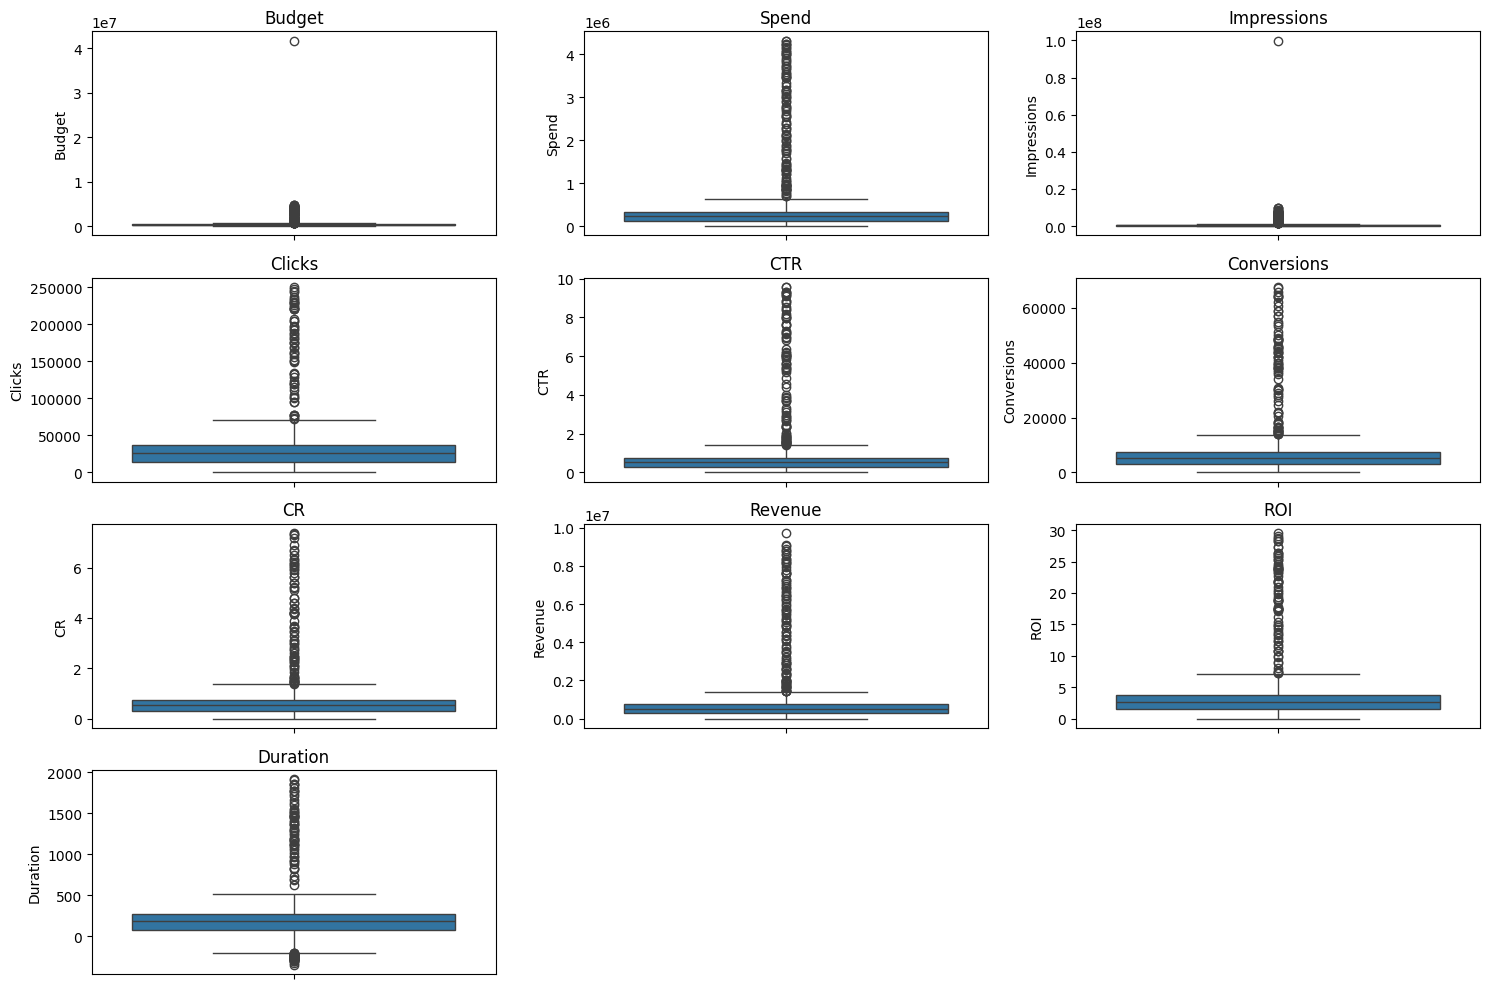

In [41]:
# Lista de columnas numéricas
columnas_numericas = [
    'Budget',
    'Spend',
    'Impressions',
    'Clicks',
    'CTR',
    'Conversions',
    'CR',
    'Revenue',
    'ROI',
    'Duration'
]

# Crear gráficos de caja para cada columna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Para las columnas: Spend, Impressions, Clicks, CTR, Conversions, CR, Revenue y ROI vamos a ver cuántos outliers hay.

In [42]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

columns_to_check = ['Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI']
outliers_iqr = detect_outliers_iqr(df, columns_to_check)

for col, out in outliers_iqr.items():
    print(f"Outliers en {col}: {len(out)} filas")

Outliers en Spend: 107 filas
Outliers en Impressions: 93 filas
Outliers en Clicks: 62 filas
Outliers en CTR: 92 filas
Outliers en Conversions: 82 filas
Outliers en CR: 78 filas
Outliers en Revenue: 99 filas
Outliers en ROI: 77 filas


Vamos a crear una columna llamada Grupos de inversión, donde tendremos 4 categorías según la inversión utilizada para la camapaña de marketing: baja, media, alta y muy alta. Esto nos ayudará a reducir el impacto de los outliers.

In [43]:
# Definir los límites para cada categoría de inversión
bajainv = df['Spend'].quantile(0.25)
mediainv = df['Spend'].quantile(0.5)
altainv = df['Spend'].quantile(0.75)

# Crear la nueva columna 'Grupos_de_inversión'
df['Grupos_de_inversión'] = pd.cut(df['Spend'], bins=[0, bajainv, mediainv, altainv, float('inf')],
                                   labels=['Baja', 'Media', 'Alta', 'Muy Alta'])

# Verificar la nueva columna
df[['Spend', 'Grupos_de_inversión']].head()

# Mostrar los valores únicos en la columna 'Grupos_de_inversión'
print(df['Grupos_de_inversión'].unique())

# Mostrar la frecuencia de cada valor en la columna 'Grupos_de_inversión'
print(df['Grupos_de_inversión'].value_counts())

['Media', 'Baja', 'Alta', 'Muy Alta']
Categories (4, object): ['Baja' < 'Media' < 'Alta' < 'Muy Alta']
Grupos_de_inversión
Baja        1205
Media       1205
Muy Alta    1205
Alta        1204
Name: count, dtype: int64


#### 4.3 Corrección de inconsistencias.

In [44]:
# Lista de columnas categóricas
categorical_columns = ['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Market_Segment', 'Grupos_de_inversión']

# Función para limpiar los valores categóricos
def clean_categorical_data(df, columns):
    for column in columns:
        df[column] = df[column].str.lower().str.strip()
    return df

# Aplicar la función de limpieza a las columnas categóricas
df = clean_categorical_data(df, categorical_columns)

In [45]:
# Verificar los cambios
print(df[categorical_columns].head(5))

  Campaign_ID    Channel Product_Category        Region Market_Segment  \
0     cam0001  billboard          fashion  kuala lumpur         medium   
2     cam0003      radio      electronics        penang         medium   
3     cam0004      email      electronics        penang           high   
4     cam0005      radio          fashion  kuala lumpur            low   
5     cam0006         tv      electronics        penang         medium   

  Grupos_de_inversión  
0               media  
2                baja  
3                alta  
4                baja  
5               media  


In [46]:
# Verificar duplicados
duplicate_rows = df[df.duplicated()]
print(f"Número de filas duplicadas: {duplicate_rows.shape[0]}")

Número de filas duplicadas: 0


In [47]:
# Verificar valores únicos en cada columna categórica
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en {column}: {unique_values}")

Valores únicos en Campaign_ID: ['cam0001' 'cam0003' 'cam0004' ... 'cam4998' 'cam4999' 'cam5000']
Valores únicos en Channel: ['billboard' 'radio' 'email' 'tv' 'social media' 'news']
Valores únicos en Product_Category: ['fashion' 'electronics' 'automotive' 'groceries' 'health']
Valores únicos en Region: ['kuala lumpur' 'penang' 'sarawak' 'johor' 'sabah' 'malacca']
Valores únicos en Market_Segment: ['medium' 'high' 'low']
Valores únicos en Grupos_de_inversión: ['media' 'baja' 'alta' 'muy alta']


### 5. Análisis Exploratorio de datos (EDA)

#### 5.1 Análisis Univariado.

##### 5.1.1 Análisis de la distribución de variables numéricas.

Aqui podemos observar la distribución de todas las variables numéricas.

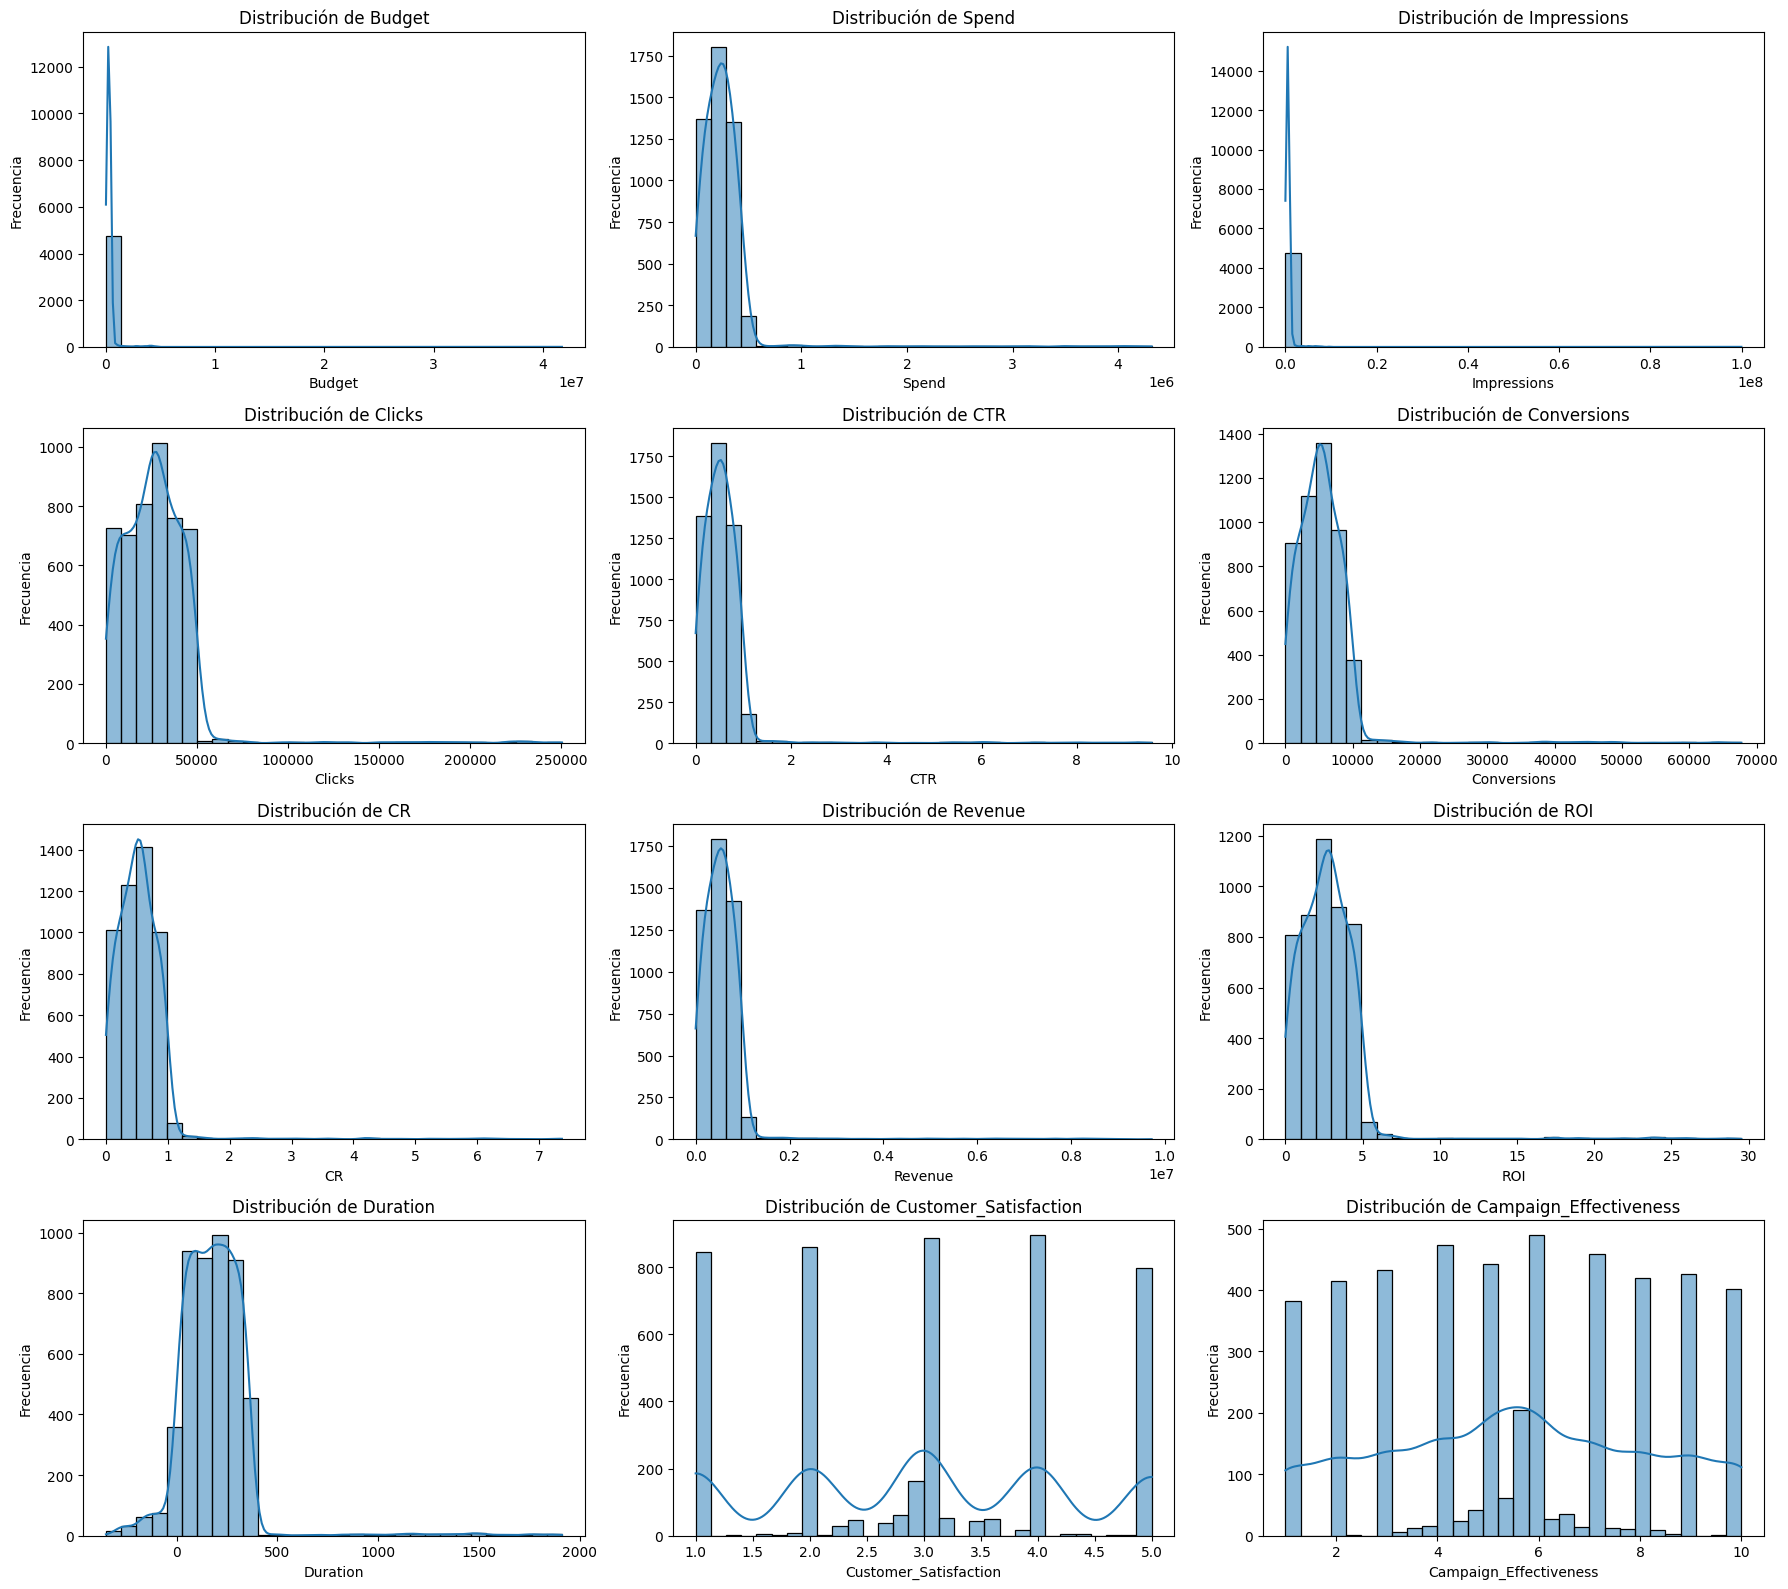

In [48]:
# Lista de columnas numéricas
numeric_columns = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR',
                   'Conversions', 'CR', 'Revenue', 'ROI', 'Duration',
                   'Customer_Satisfaction', 'Campaign_Effectiveness']

# Configuración de la cuadrícula: 3 columnas y tantas filas como necesitemos
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Redondeo hacia arriba
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Generar gráficos en cada subgráfico de la cuadrícula
for idx, col in enumerate(numeric_columns):
    row = idx // num_cols
    col_pos = idx % num_cols
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Distribución de {col}')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frecuencia')

# Eliminar subgráficos vacíos si el número de columnas no es múltiplo de 3
for idx in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


##### 5.1.2 Análisis de la frecuencia de variables categóricas.

Aqui podemos observar la frecuencia de las variables categóricas.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2329948835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


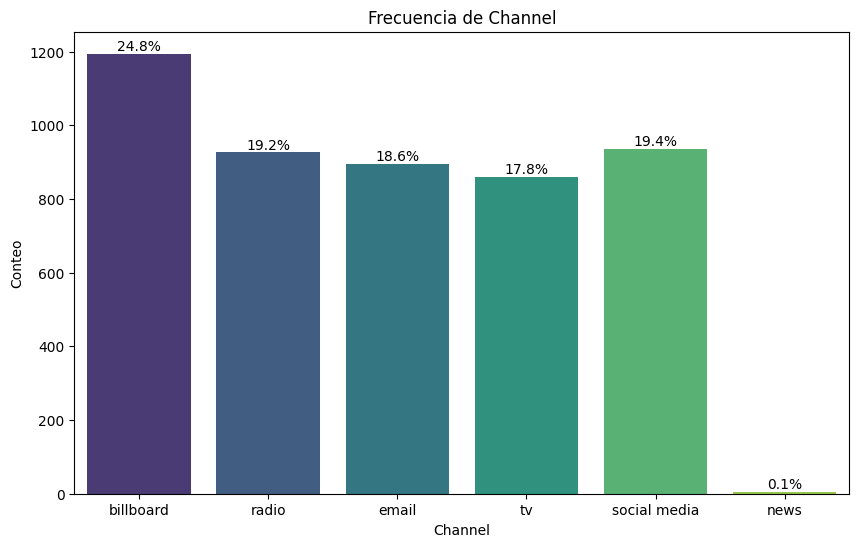

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2329948835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


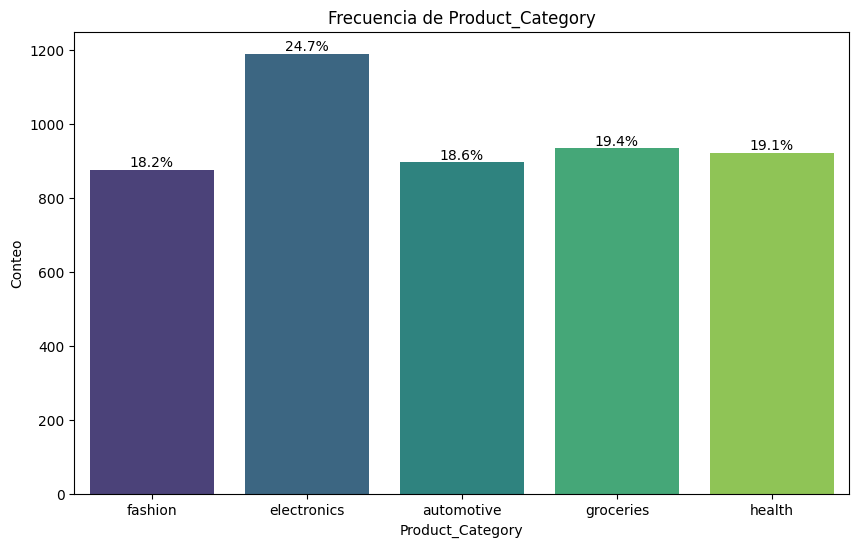

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2329948835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


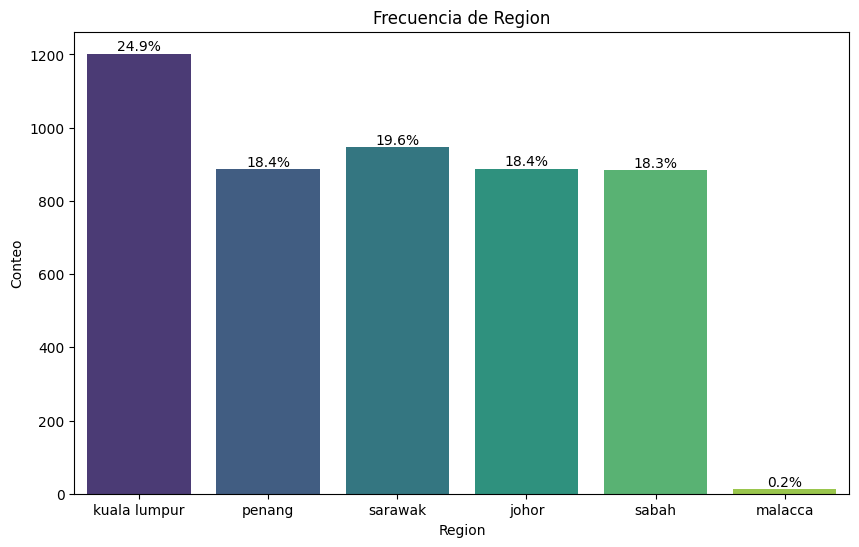

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2329948835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


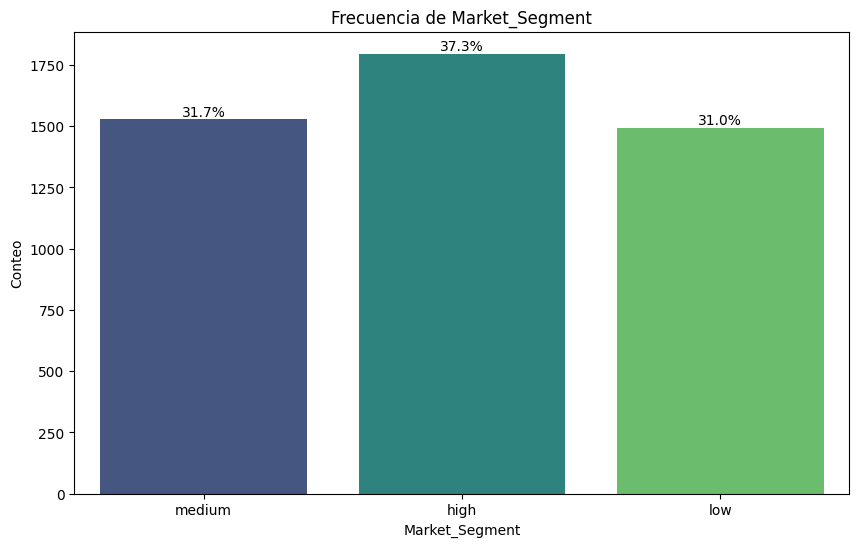

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2329948835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


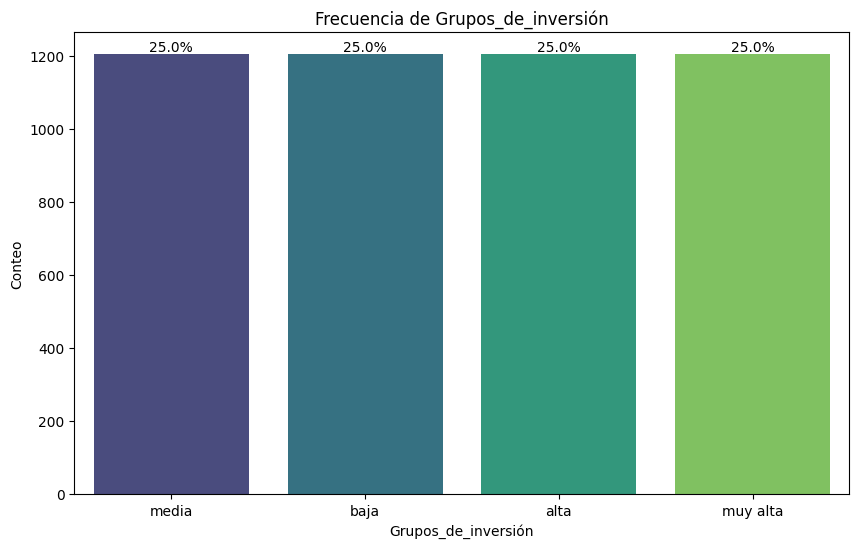

In [49]:
categorical_columns = ['Channel', 'Product_Category', 'Region', 'Market_Segment', 'Grupos_de_inversión']
for idx, col in enumerate(categorical_columns):
    plt.figure(figsize=(10, 6))
    total = df[col].count()
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()/total:.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='bottom', fontsize=10, color='black')
    plt.show()


#### 5.2 Análisis Bivariado

##### 5.2.1 Análisis **Numérica** vs **Numérica**

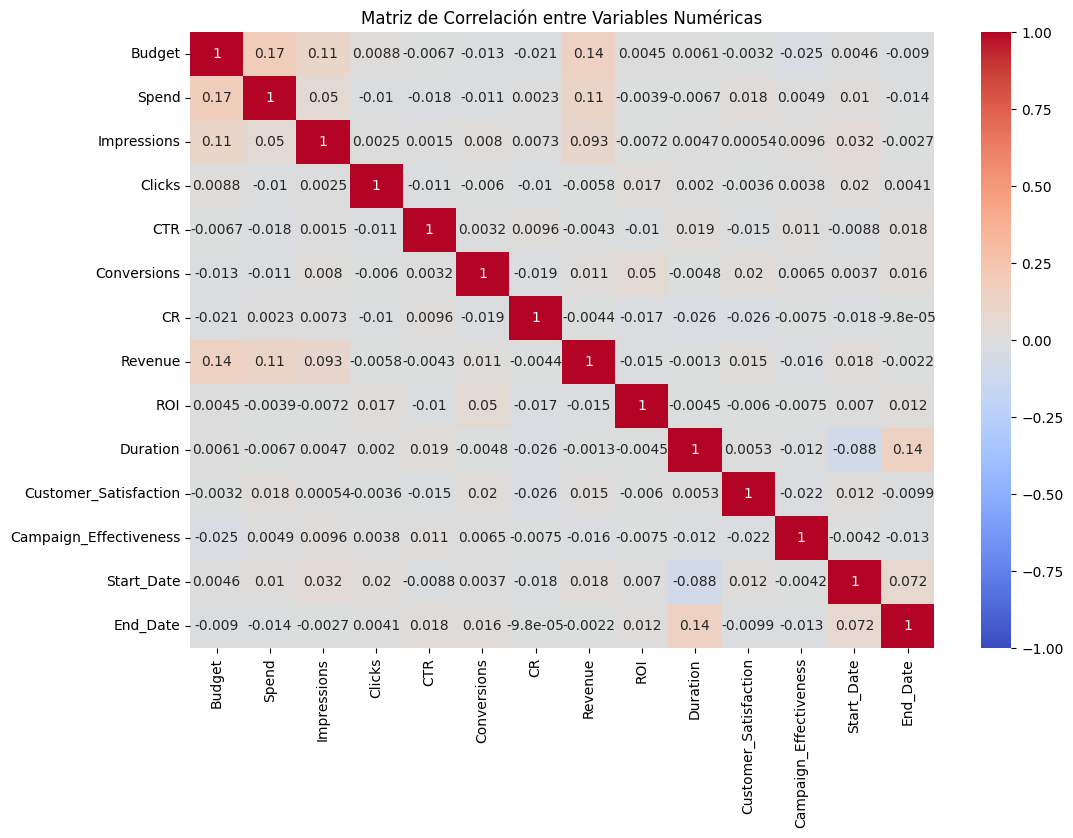

In [50]:
# Lista de columnas numéricas relevantes
numeric_columns = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR',
                   'Conversions', 'CR', 'Revenue', 'ROI', 'Duration',
                   'Customer_Satisfaction', 'Campaign_Effectiveness', "Start_Date", "End_Date"]

# Matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()



Observamos que no hay apenas relación entre las variables numéricas, por lo que no merece la pena representar la relación en gráficos individuales.

##### 5.2.2 Análisis **Categórica** vs **Numérica**

Aqui si que podemos ver alguna relación que será mostrada más adelante, en el punto 6.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

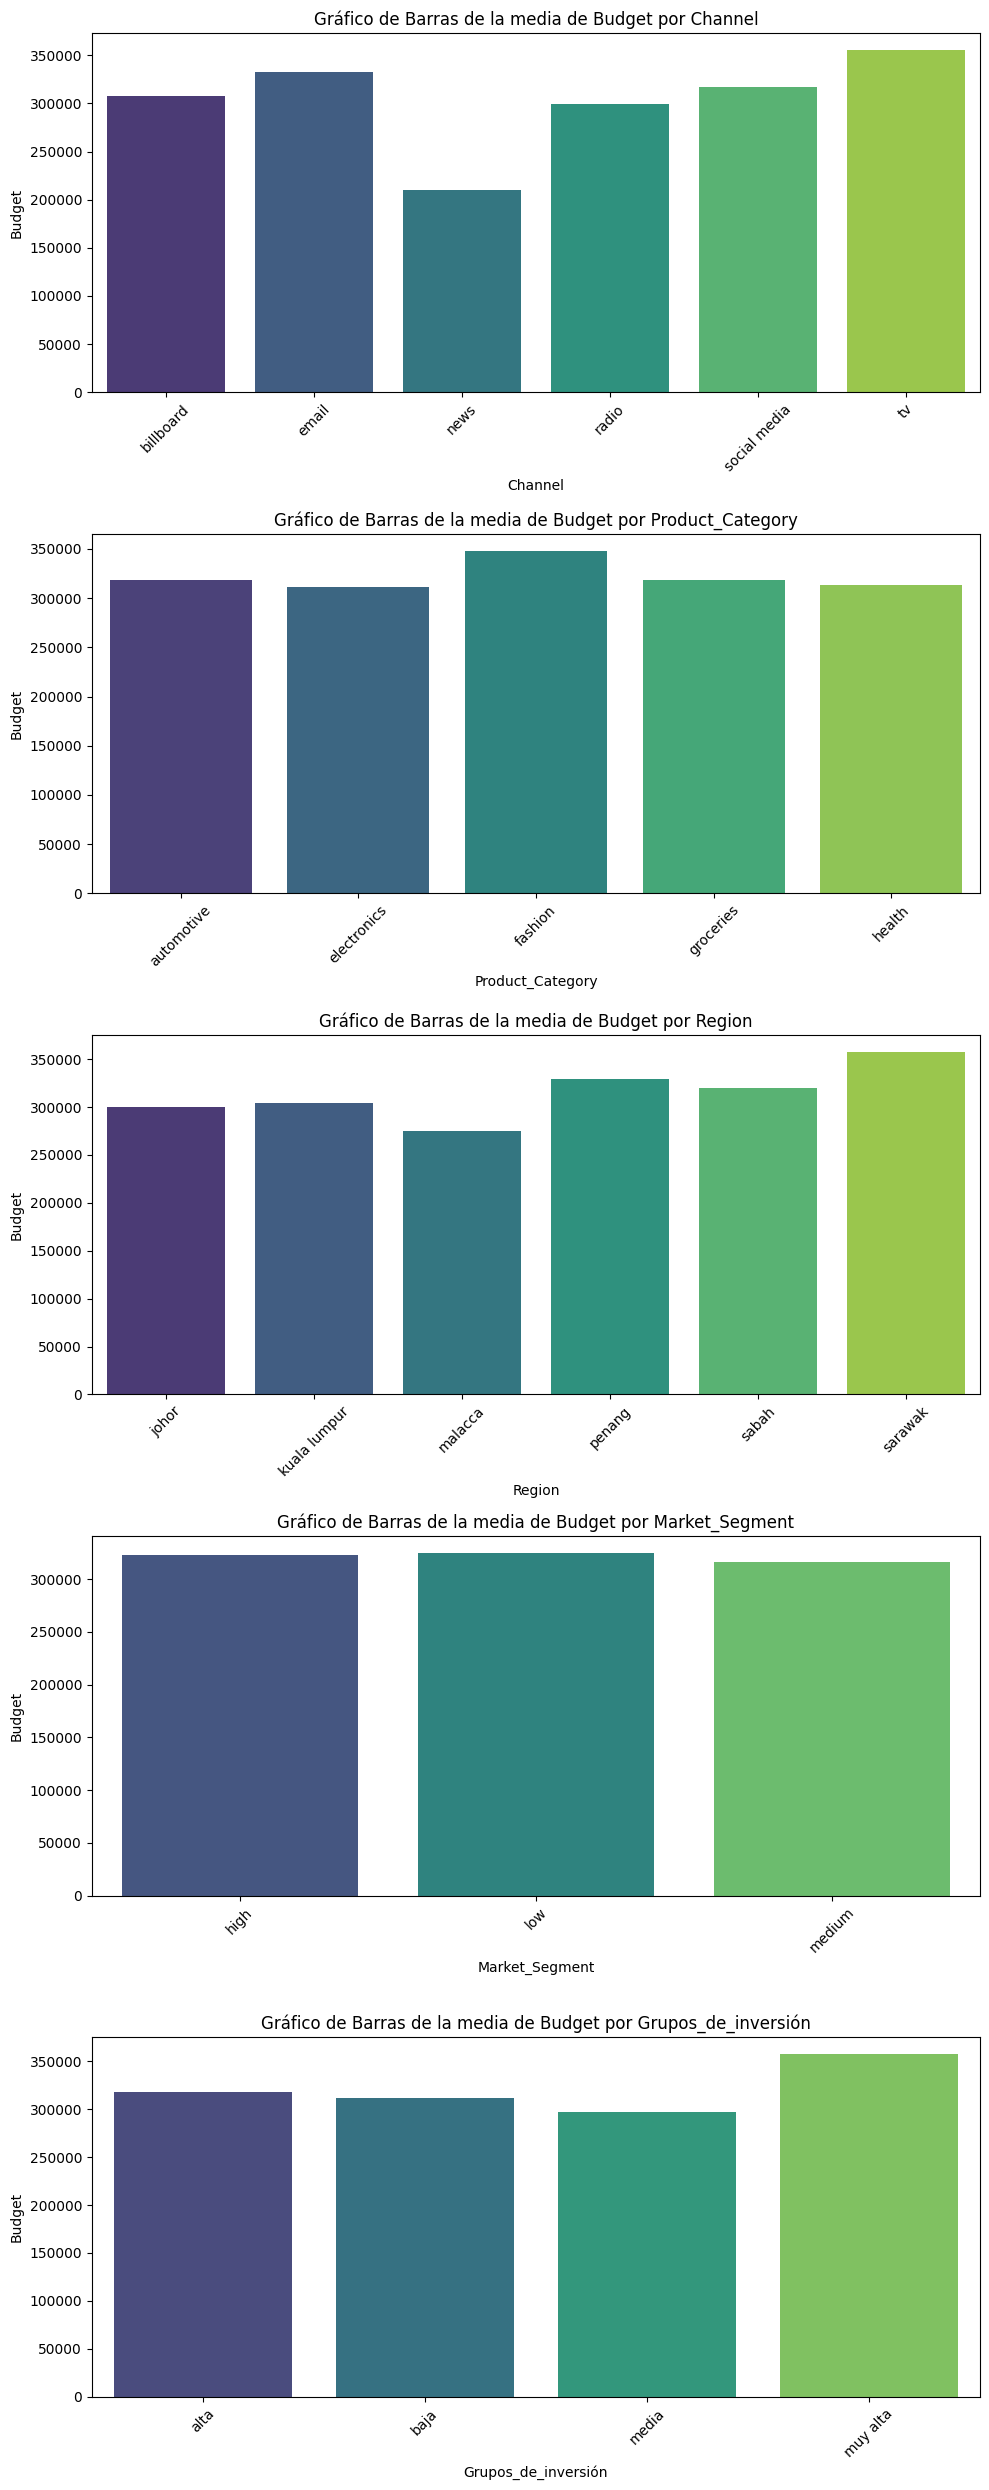

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

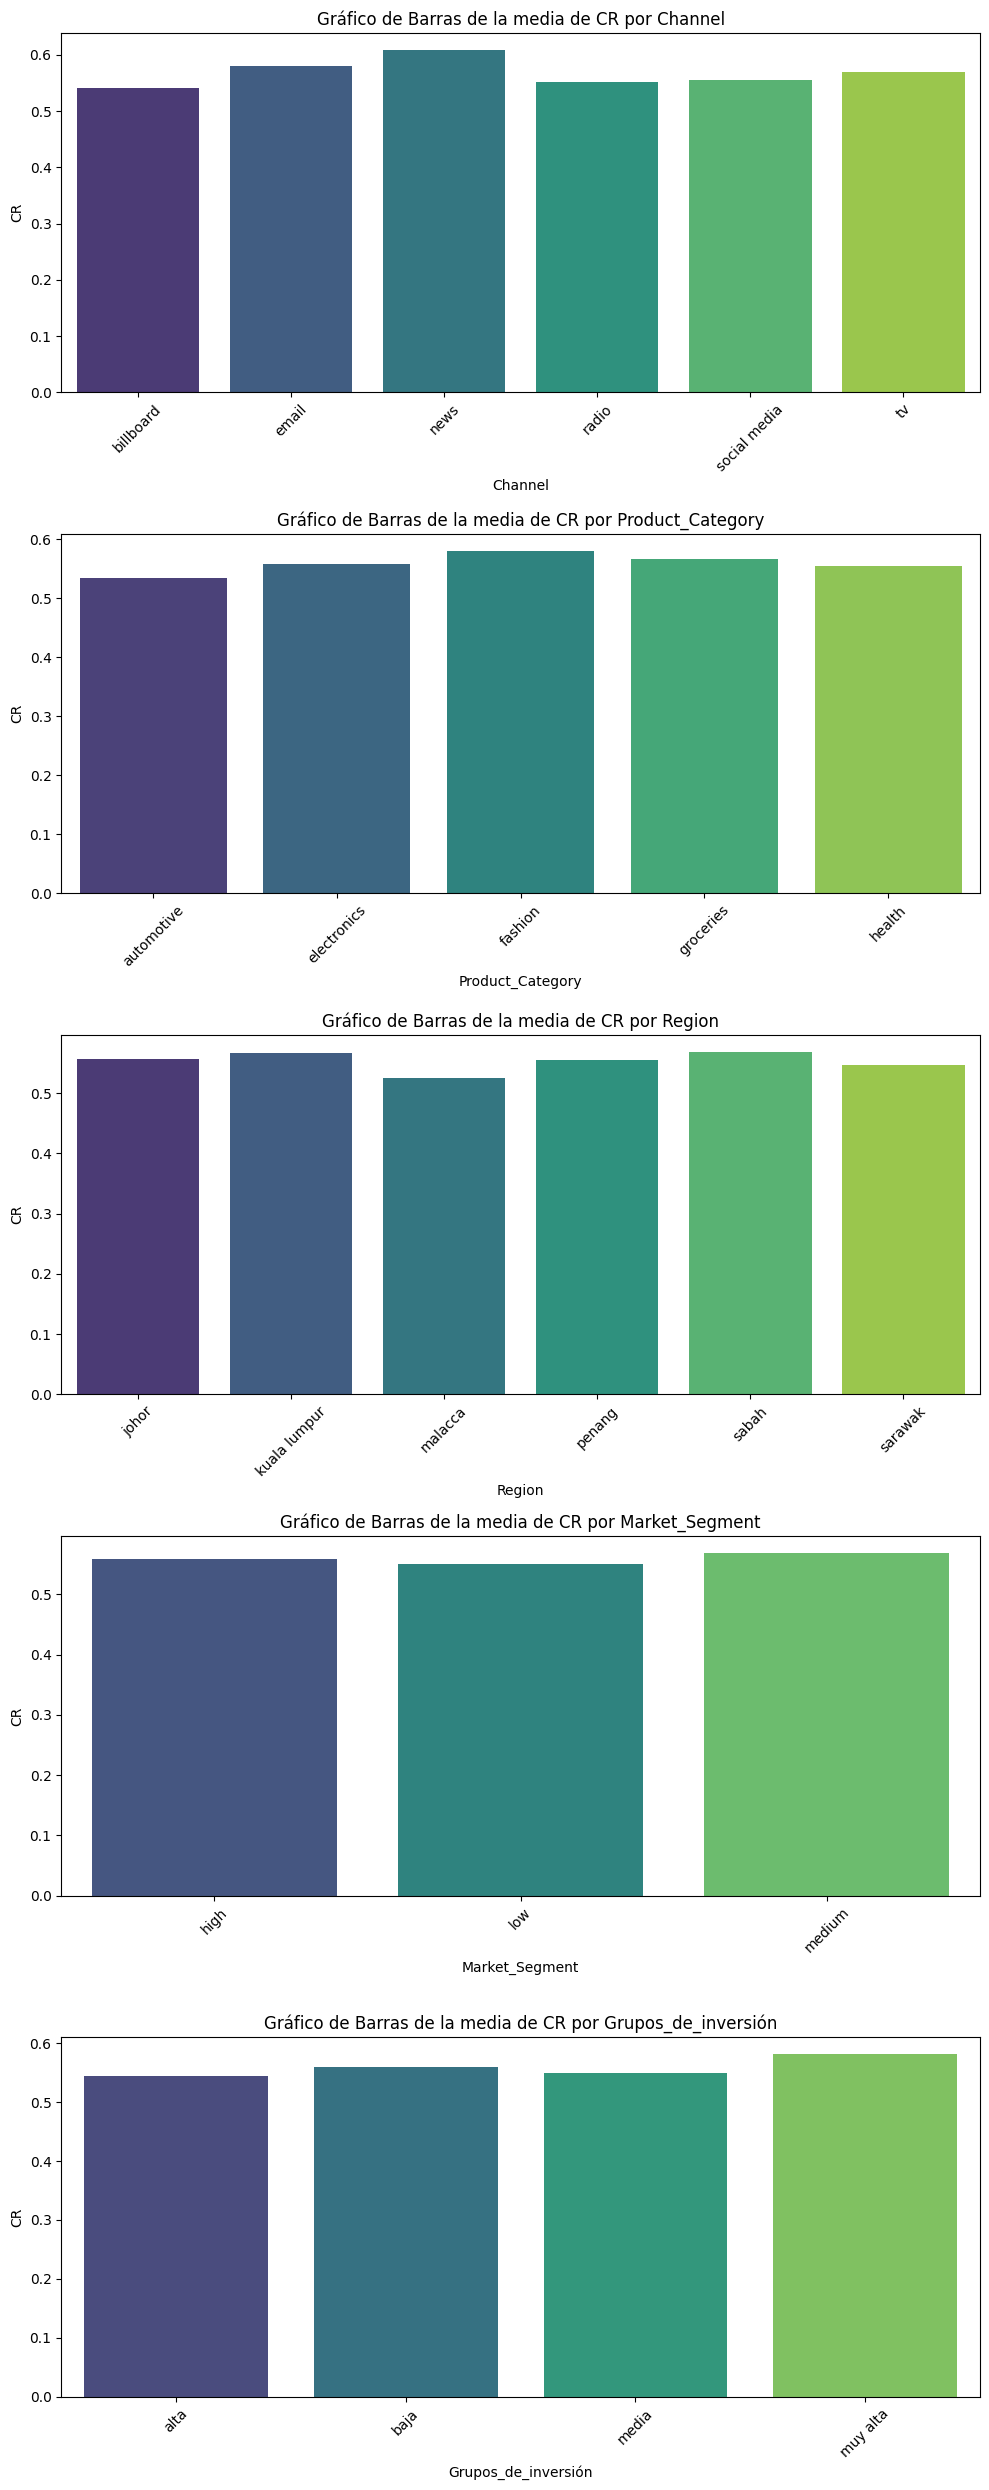

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

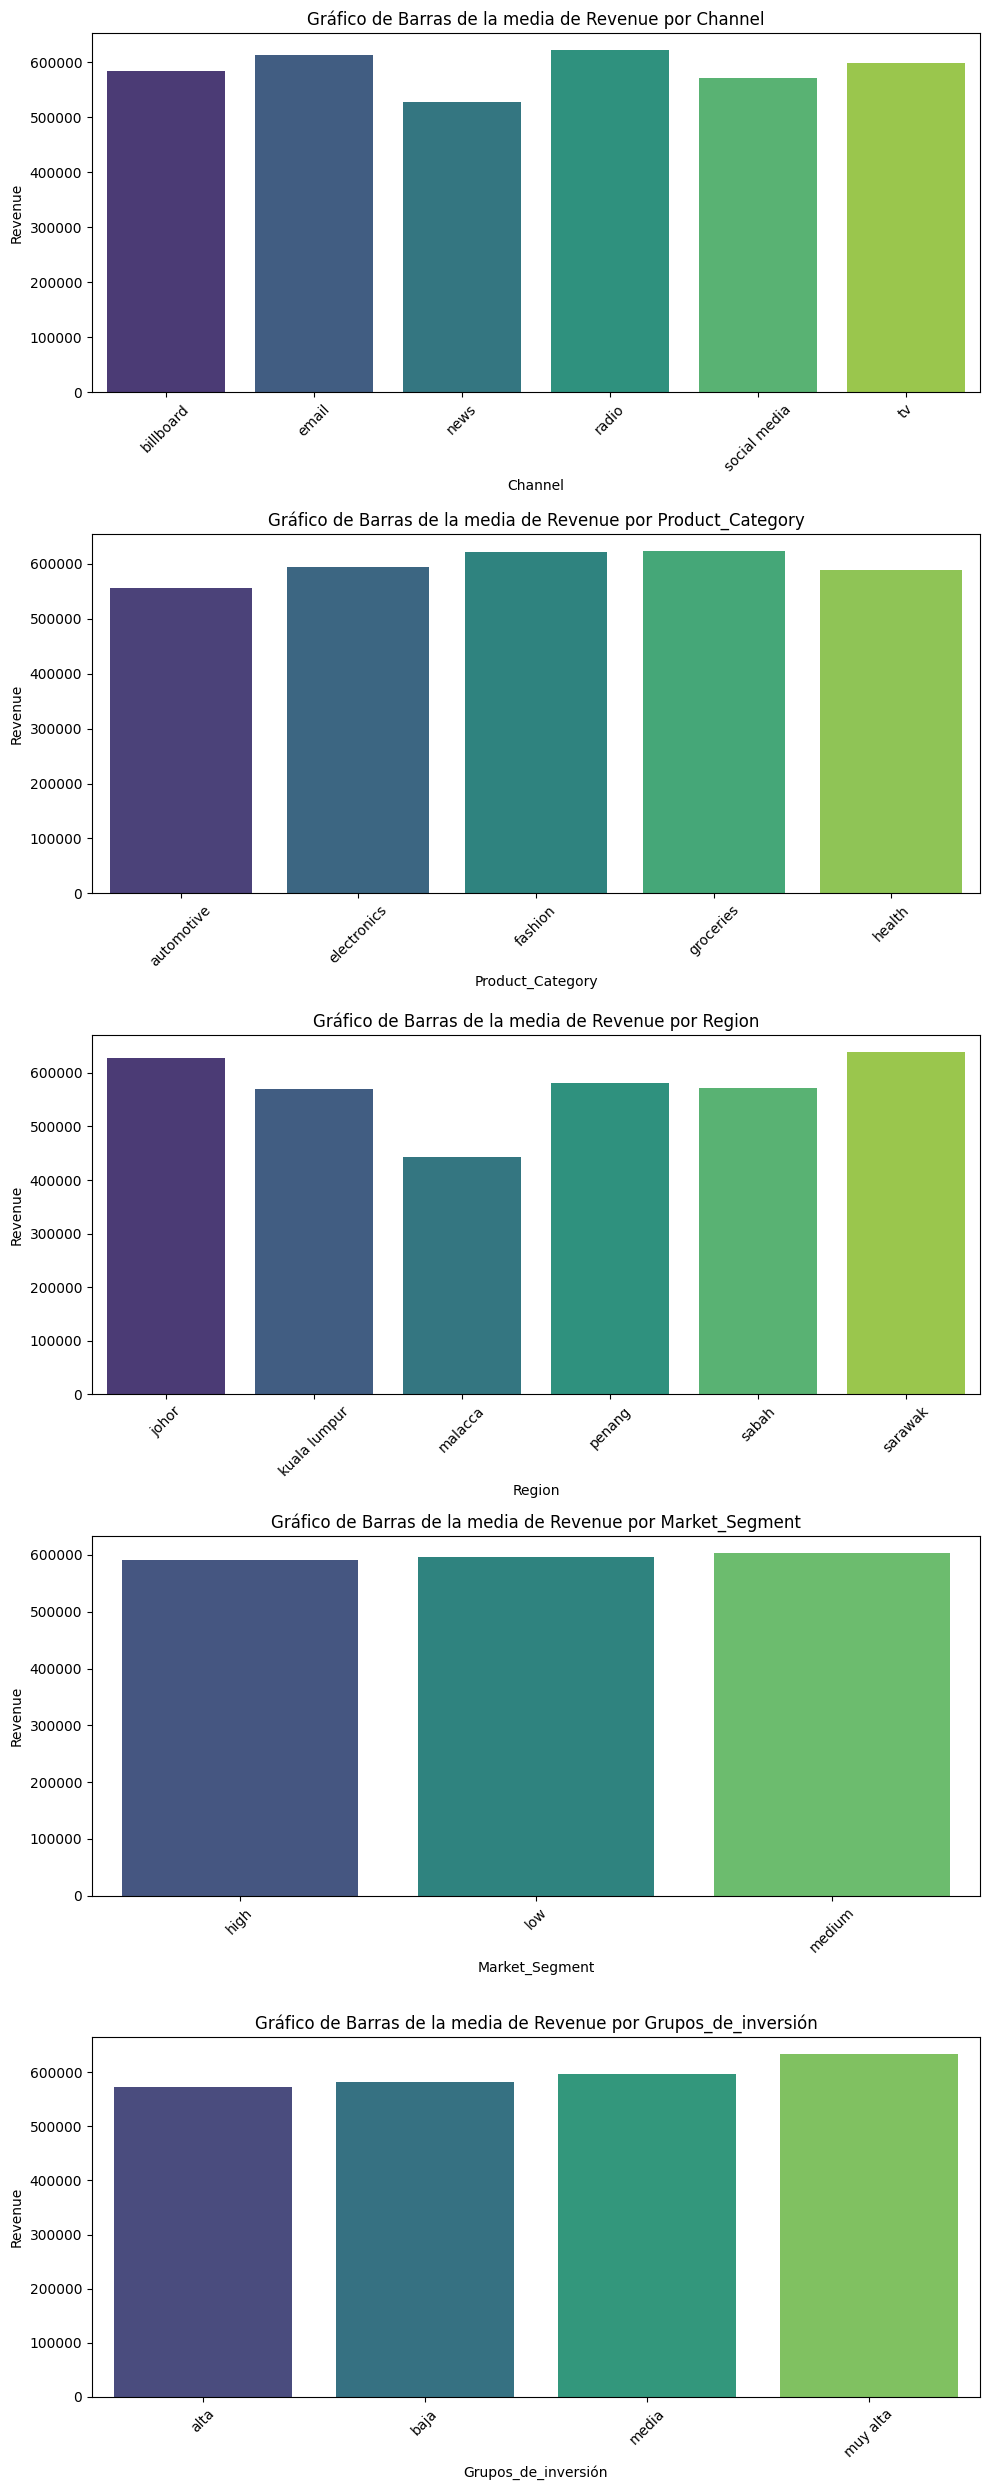

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

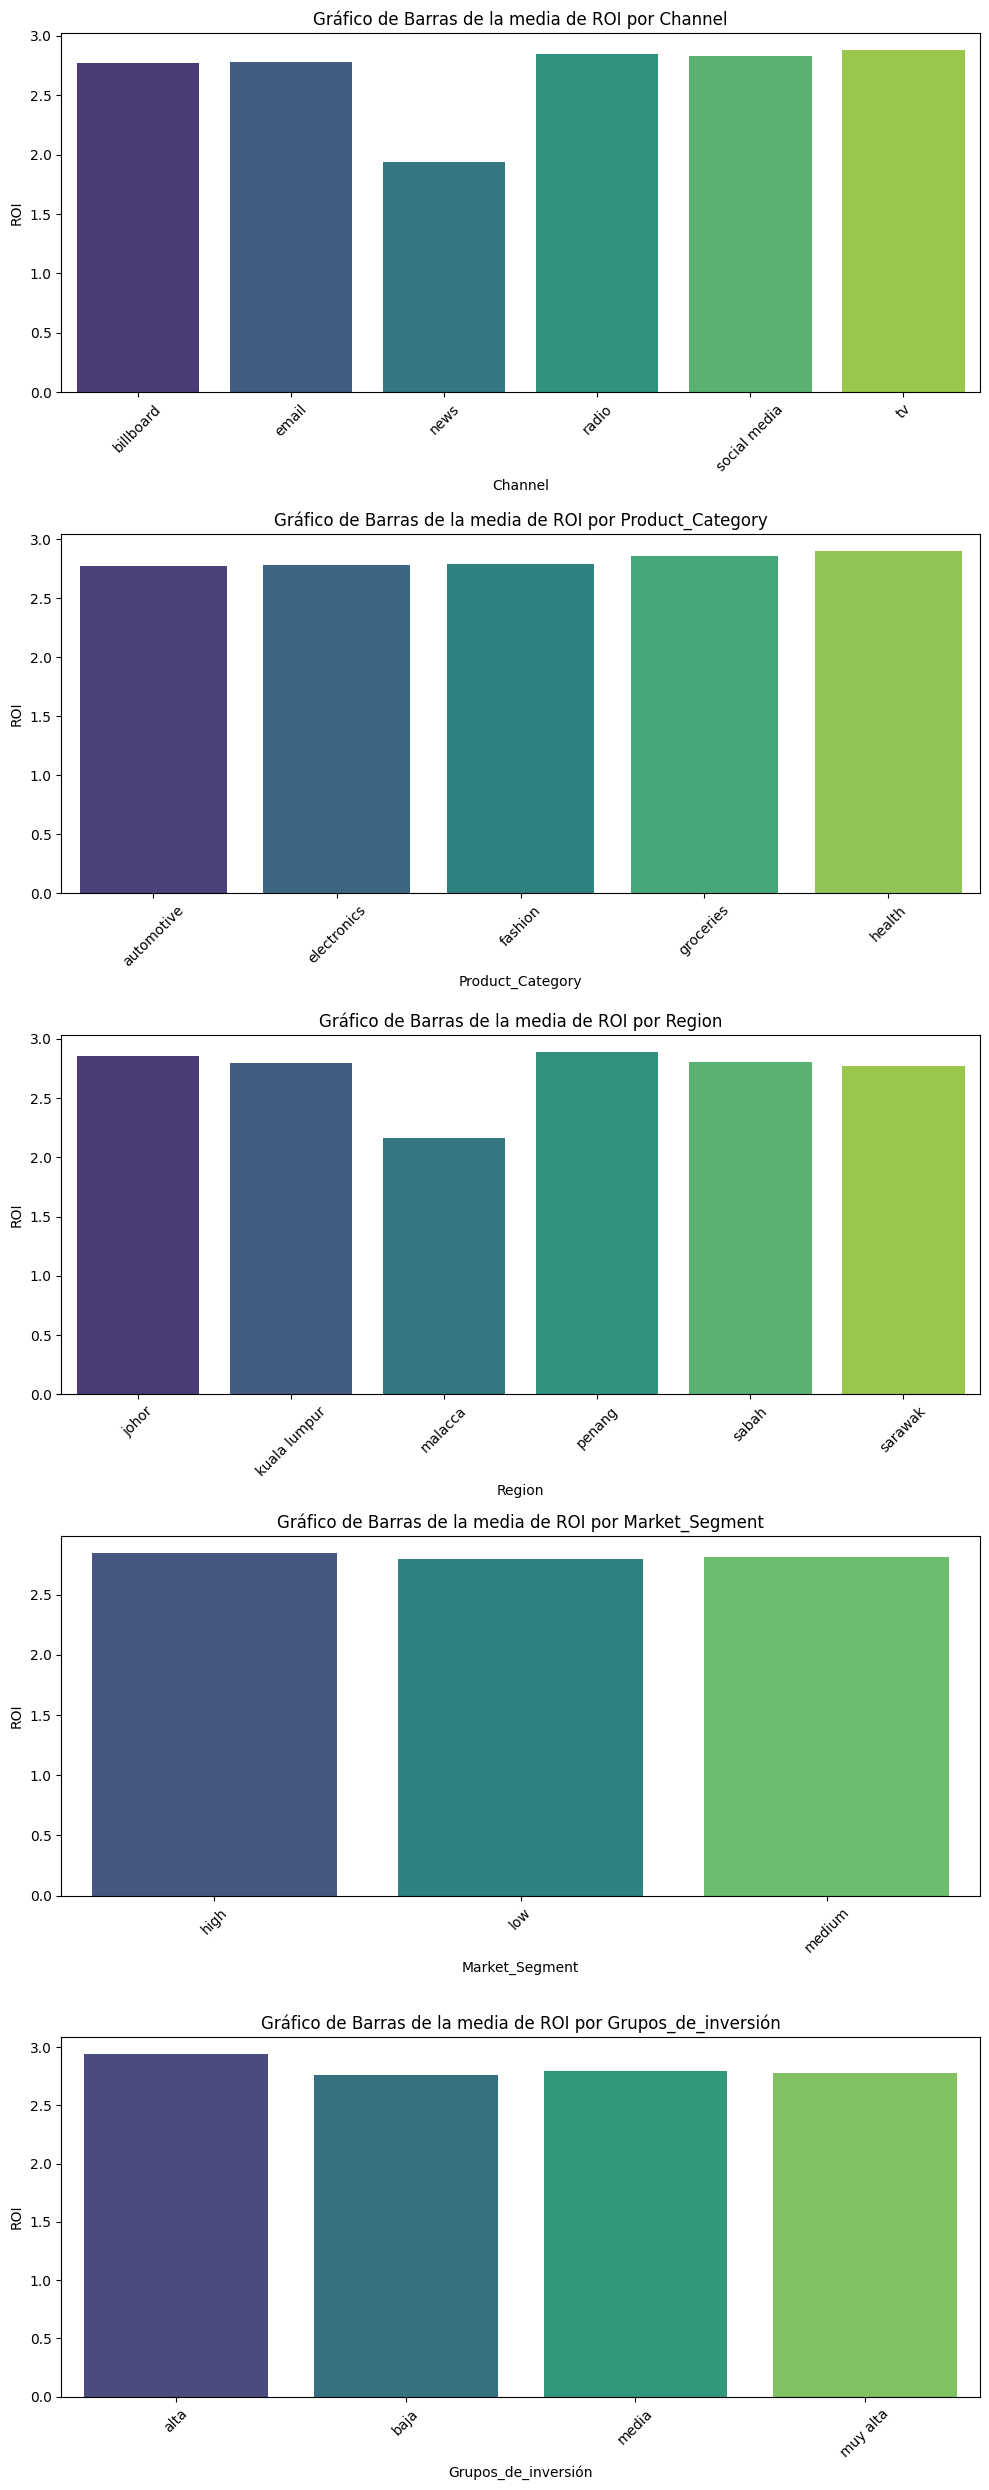

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

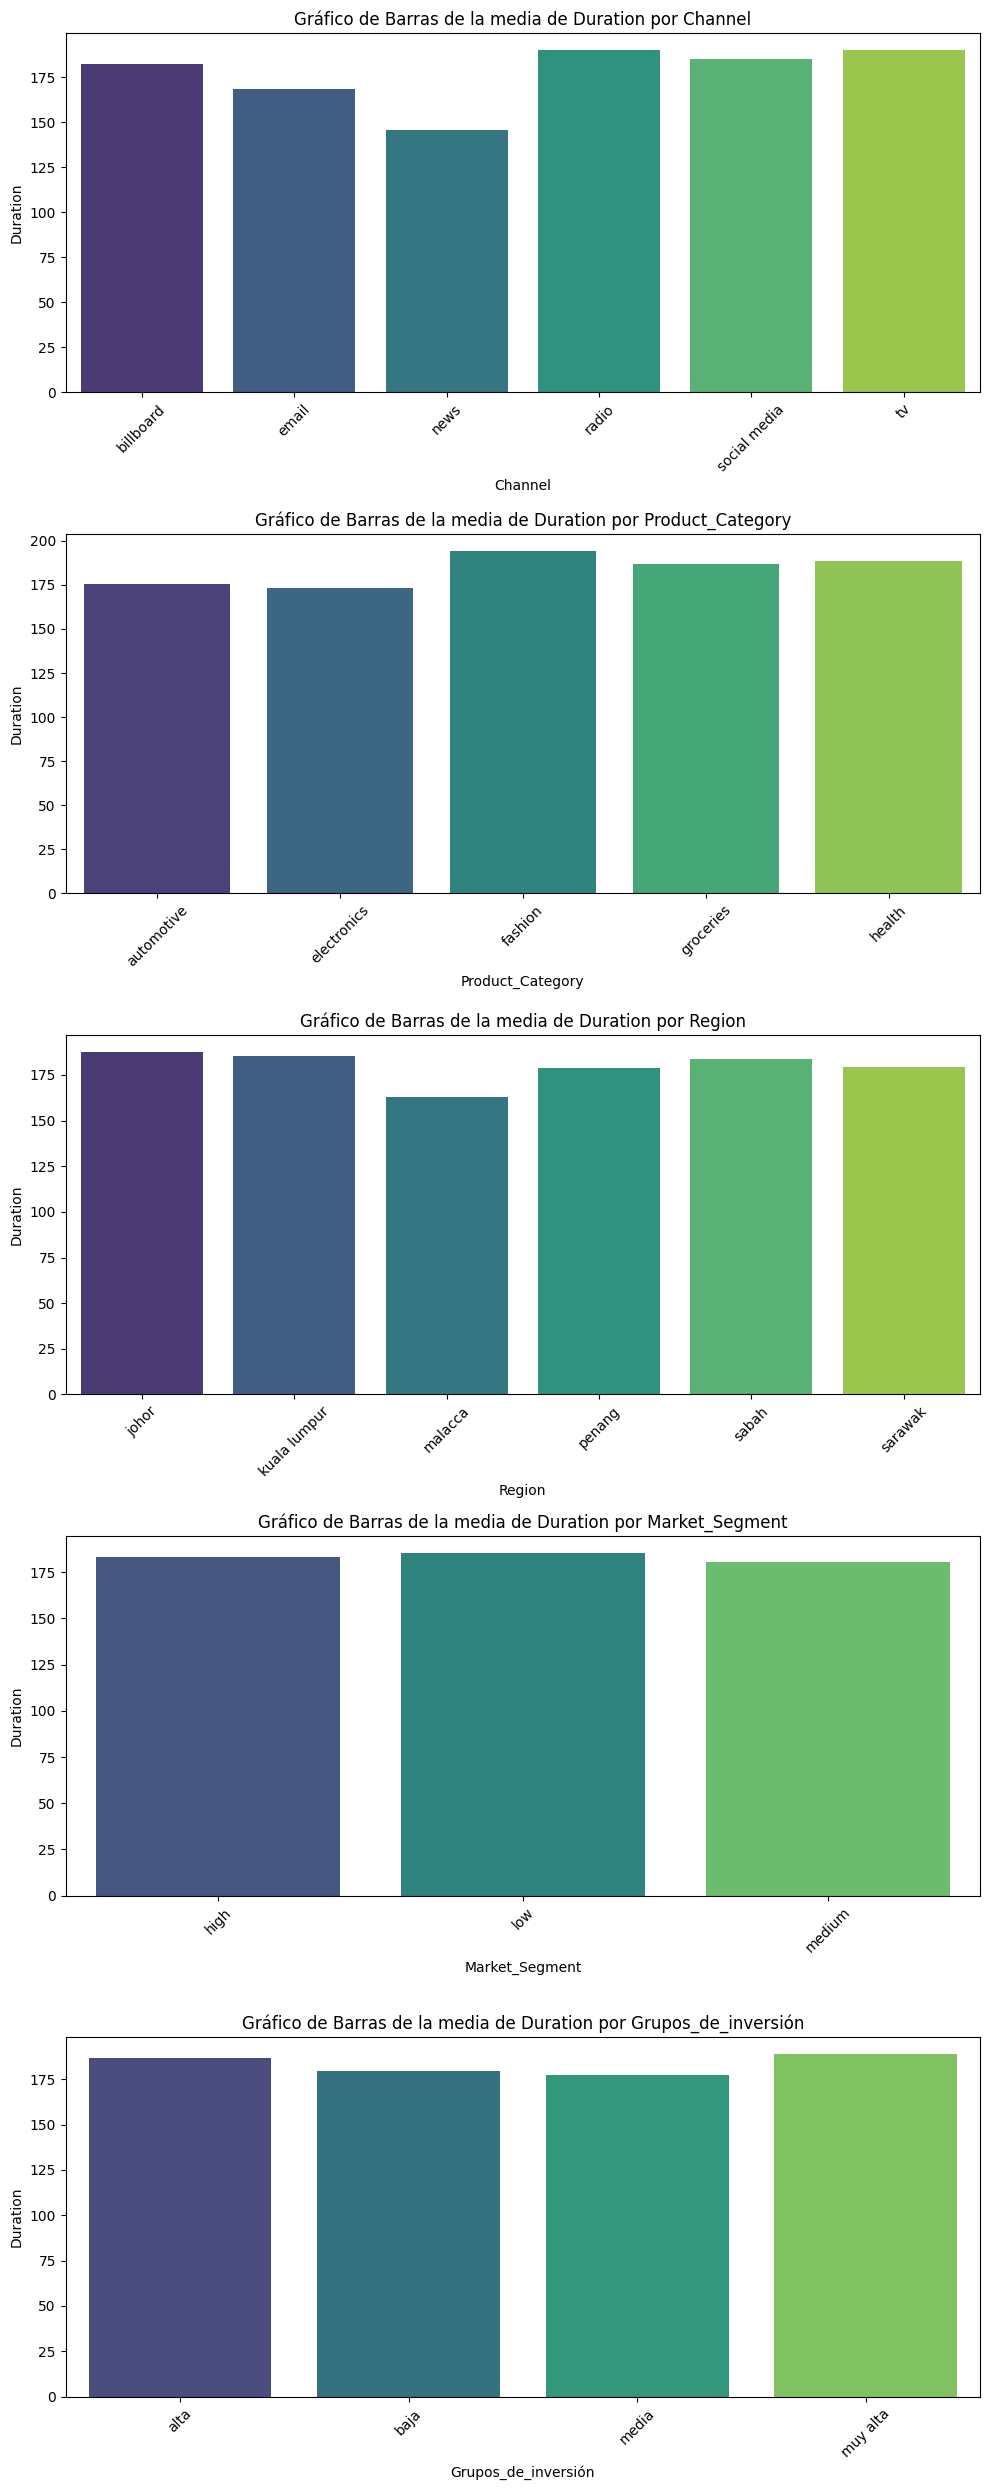

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\4153394298.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[

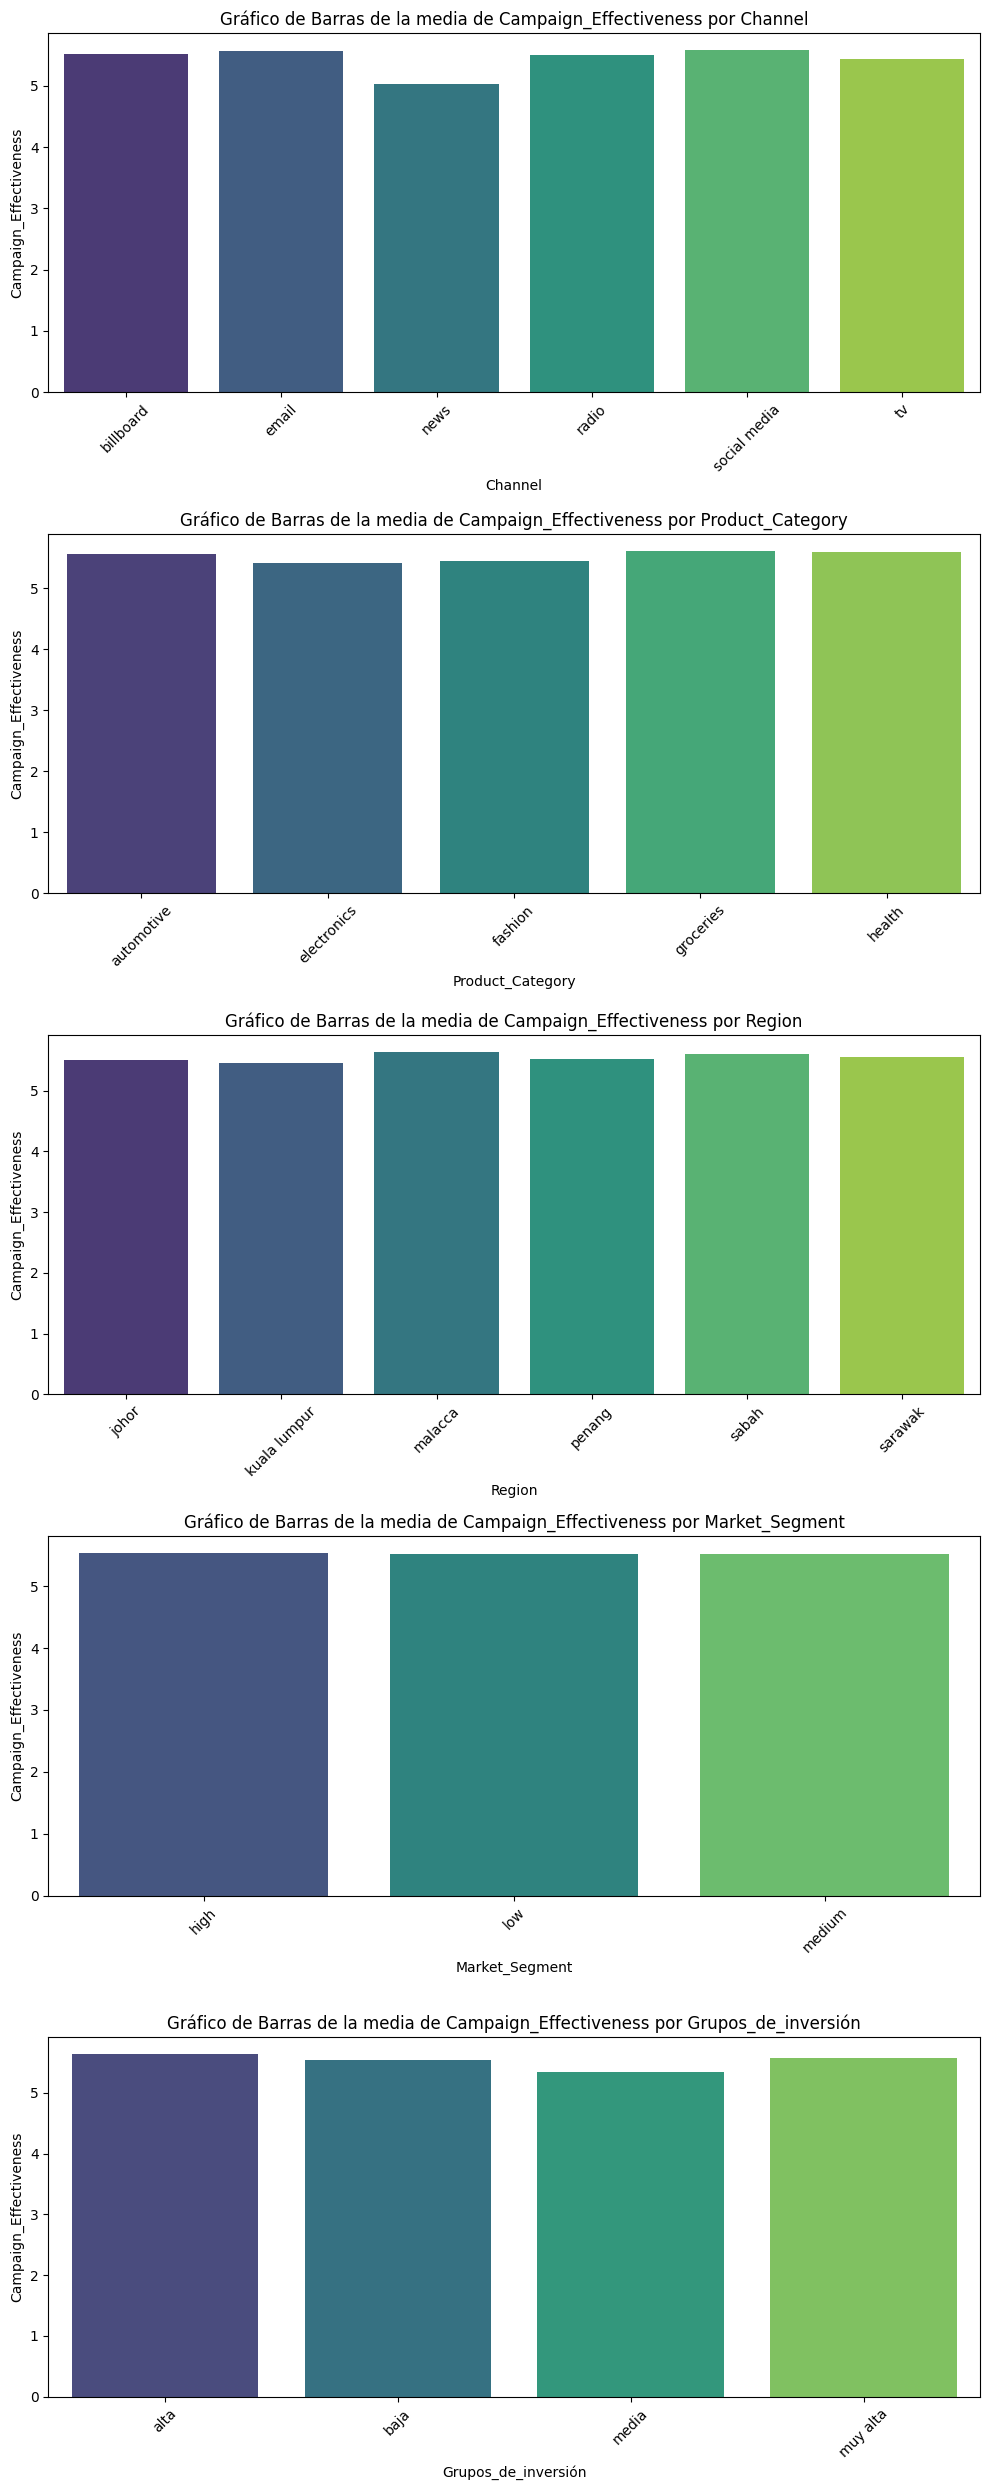

In [51]:
# Lista de columnas categóricas y numéricas
categorical_columns = ['Channel', 'Product_Category', 'Region', 'Market_Segment', 'Grupos_de_inversión']
numeric_columns = ['Budget', 'CR', 'Revenue', 'ROI', 'Duration', "Campaign_Effectiveness"]

# Gráficos de barras
for target_numeric in numeric_columns:
    fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 5))

    for i, cat_col in enumerate(categorical_columns):
        # Agrupar datos y calcular la media de cada categoría
        mean_data = df.groupby(cat_col)[target_numeric].mean().reset_index()

        # Gráfico de barras
        sns.barplot(x=cat_col, y=target_numeric, data=mean_data, ax=axes[i], palette="viridis")
        axes[i].set_title(f'Gráfico de Barras de la media de {target_numeric} por {cat_col}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

##### 5.2.3 Análisis **Categórica** vs **Categórica**

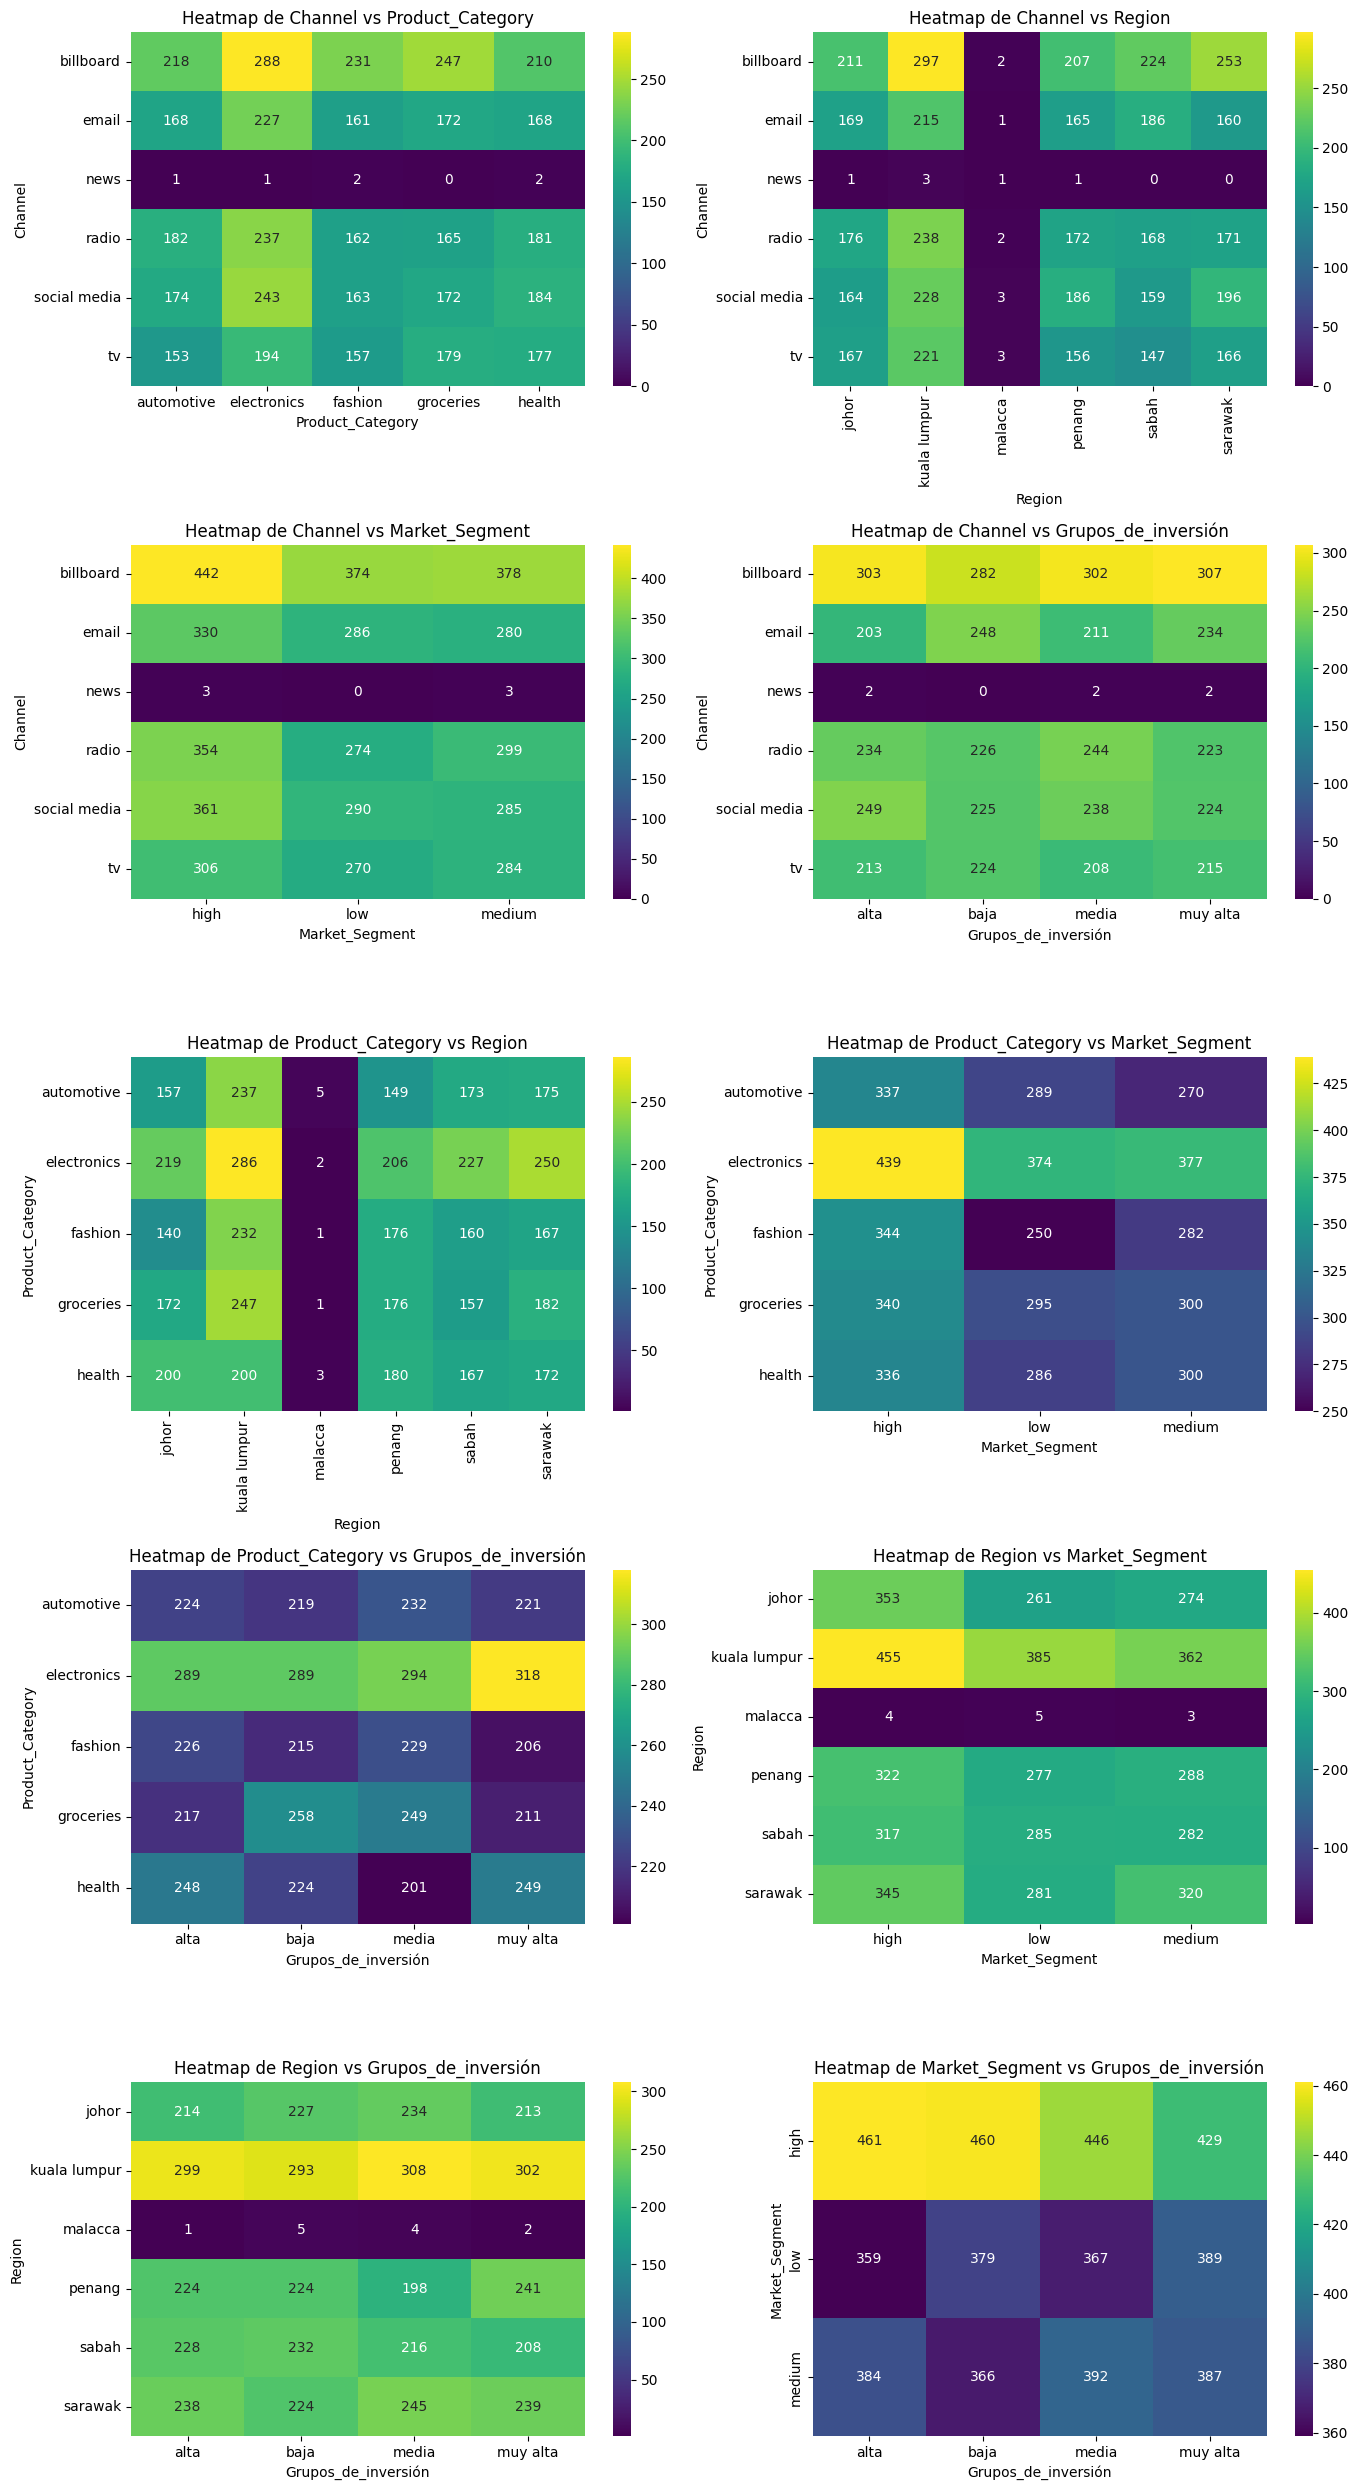

In [52]:
# Selección de columnas categóricas
categorical_columns = ['Channel', 'Product_Category', 'Region', 'Market_Segment', 'Grupos_de_inversión']
num_plots = (len(categorical_columns) * (len(categorical_columns) - 1)) // 2  # Número total de gráficos

# Configuración de las filas necesarias en dos columnas
num_columns = 2
num_rows = (num_plots + num_columns - 1) // num_columns

# Crear una figura para los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(14, num_rows * 5))
axes = axes.flatten()  # Aplanar los ejes para indexar fácilmente

plot_index = 0  # Índice para cada subplot

# Bucle para crear tablas de contingencia y heatmaps
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        cat_col1 = categorical_columns[i]
        cat_col2 = categorical_columns[j]

        # Tabla de contingencia
        contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])

        # Heatmap de la tabla de contingencia
        sns.heatmap(contingency_table, annot=True, cmap="viridis", fmt="d", ax=axes[plot_index])  # Cambié a "viridis"
        axes[plot_index].set_title(f"Heatmap de {cat_col1} vs {cat_col2}")
        axes[plot_index].set_xlabel(cat_col2)
        axes[plot_index].set_ylabel(cat_col1)

        plot_index += 1

# Eliminar gráficos vacíos si hay un número impar de gráficos
for idx in range(plot_index, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


#### 5.3 Análisis multivariado.

In [53]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment', 'Grupos_de_inversión'],
      dtype='object')

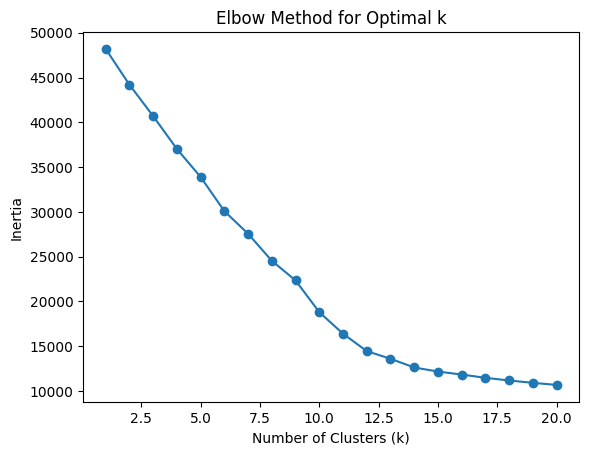

In [54]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

numeric_cols = ['Budget', 'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', 'Duration']

X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_values = range(1, 21)  # Test k from 1 to 20
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize KMeans
    kmeans.fit(X_scaled)  # Fit the model
    inertia.append(kmeans.inertia_)  # Store inertia

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [55]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize with k=12
kmeans.fit(X_scaled)  # Fit to the standardized data
df['Cluster'] = kmeans.labels_  # Assign cluster labels to the DataFrame

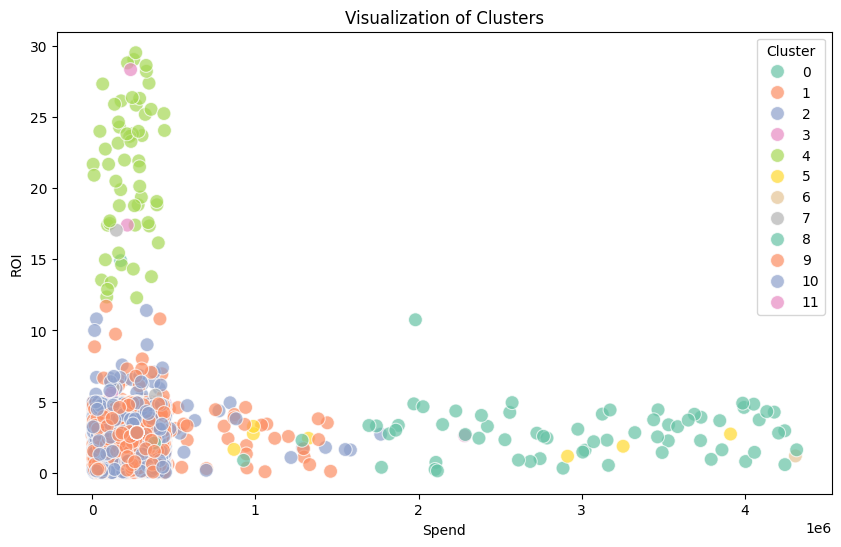

In [56]:
# Ejemplo con ROI y Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Spend', y='ROI', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Visualization of Clusters')
plt.xlabel('Spend')
plt.ylabel('ROI')
plt.legend(title='Cluster')
plt.show()

In [57]:
  # Para hacer todos los gráficos:
  # Seleccionamos solo las columnas numéricas y la columna de clústeres
#numeric_cols_with_cluster = numeric_cols + ['Cluster']

  # Crear el pairplot
#sns.pairplot(df[numeric_cols_with_cluster], hue='Cluster', palette='Set2', markers='o', diag_kind='kde')
#plt.suptitle('Pairplot of All Variables with Clusters', y=1.02)  # Título del gráfico
#plt.show()

### 6. Visualización de los datos.

#### Ingresos por Canal

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\3467437097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Revenue', data=df, palette='viridis')


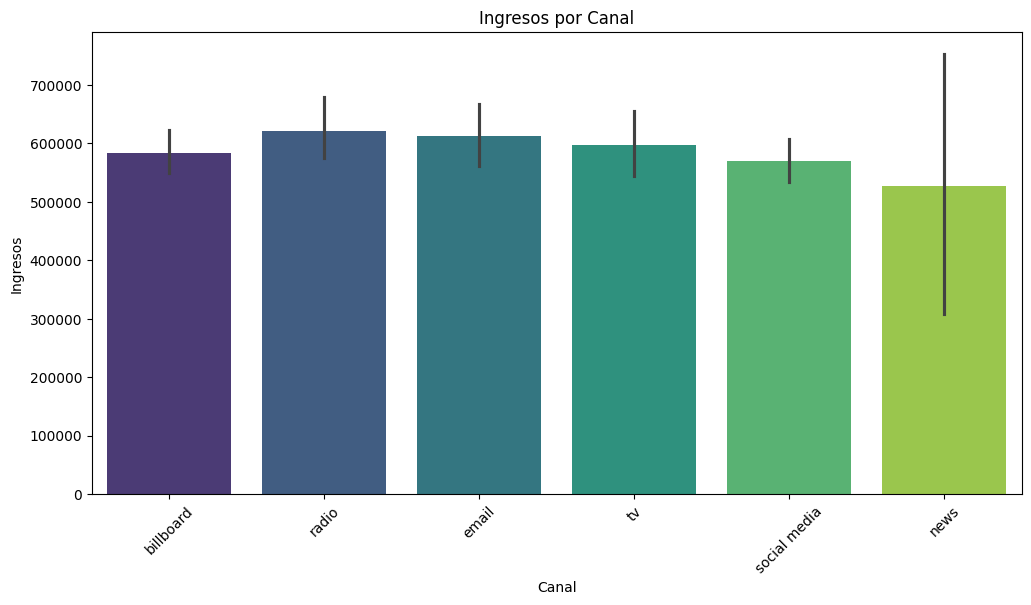

In [58]:
# Gráfico de barras: Ingresos por Canal
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Revenue', data=df, palette='viridis')
plt.title('Ingresos por Canal')
plt.xlabel('Canal')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

La gran variación en el canal News podría indicar que, aunque tiene el potencial de generar altos ingresos, estos ingresos no son consistentes. Es decir, este canal puede ser muy rentable, pero solo en ciertos tipos de campañas o contextos específicos. Una gran variabilidad en los ingresos puede ser un indicador de mayor riesgo. Si los ingresos son impredecibles, esto podría significar que el canal "news" no es una fuente estable de ingresos, lo cual representa un riesgo. 

#### Gráfico de barras de Revenue y ROI por Región.

In [59]:
# Valores únicos en la columna 'Region'
print(df['Region'].unique())

['kuala lumpur' 'penang' 'sarawak' 'johor' 'sabah' 'malacca']


In [60]:
# Calcular el ROI y el Revenue promedio por región
roi_by_region = df.groupby('Region')['ROI'].mean().reset_index()
revenue_by_region = df.groupby('Region')['Revenue'].mean().reset_index()

# Mostrar el resultado
print(roi_by_region)
print(revenue_by_region)

         Region       ROI
0         johor  2.855454
1  kuala lumpur  2.793252
2       malacca  2.166667
3        penang  2.887271
4         sabah  2.802648
5       sarawak  2.773023
         Region        Revenue
0         johor  627067.993571
1  kuala lumpur  570630.880746
2       malacca  442295.616667
3        penang  580794.046469
4         sabah  571678.683062
5       sarawak  638580.543274


In [61]:
data = {
    'Region': ['kuala lumpur', 'penang', 'sarawak', 'johor', 'sabah', 'malacca'],
    'ROI': [2.793252, 2.887271, 2.773023, 2.855454, 2.802648, 2.166667],
    "Revenue": [570630, 580794, 638580, 627067, 571678, 442295 ]
}
df1 = pd.DataFrame(data)

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2194115070.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df1['Region'], rotation=45)


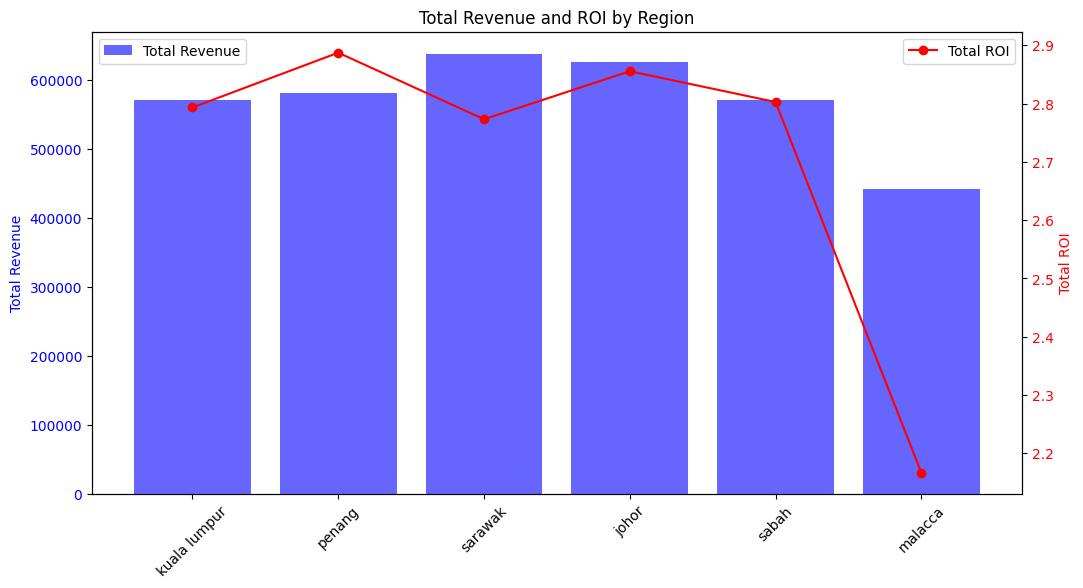

In [62]:
# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot para Revenue
ax1.bar(df1['Region'], df1['Revenue'], color='b', alpha=0.6, label='Total Revenue')
ax1.set_ylabel('Total Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(df1['Region'], rotation=45)

# Crear un segundo eje y para el ROI
ax2 = ax1.twinx()
ax2.plot(df1['Region'], df1['ROI'], color='r', marker='o', label='Total ROI')
ax2.set_ylabel('Total ROI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos y leyendas
plt.title('Total Revenue and ROI by Region')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

 El bajo ROI indica que las campañas en Malacca no están generando un retorno suficiente en comparación con la inversión realizada.  El bajo rendimiento en ingresos y ROI podría sugerir que el presupuesto asignado o la estrategia de ejecución no están adecuadamente optimizados para Malacca. Dado que la región tiene pocos ingresos, podría ser más eficiente revisar o incluso reducir la inversión en campañas en esta área.

#### Mapas geográficos de Revenue y ROI por Región.

In [63]:
# Coordenadas geográficas de las regiones, incluyendo Malacca
coordinates = {
    'kuala lumpur': {'lat': 3.1390, 'lon': 101.6869},
    'penang': {'lat': 5.4164, 'lon': 100.3327},
    'sarawak': {'lat': 1.5533, 'lon': 110.3592},
    'johor': {'lat': 1.4927, 'lon': 103.7414},
    'sabah': {'lat': 5.9804, 'lon': 116.0735},
    'malacca': {'lat': 2.1898, 'lon': 102.2501}  # Coordenadas de Malacca
}

# Añadir las coordenadas al DataFrame (re-aplicar la función)
df1['Latitude'] = df1['Region'].apply(lambda x: coordinates[x]['lat'])
df1['Longitude'] = df1['Region'].apply(lambda x: coordinates[x]['lon'])

In [64]:
# Crear el mapa geográfico utilizando 'Revenue' como métrica de rendimiento
fig = px.scatter_geo(df1,
                     lat='Latitude',
                     lon='Longitude',
                     text='Region',
                     size='Revenue',
                     color='Revenue',
                     hover_name='Region',
                     projection='natural earth',
                     title='Mapa Geográfico de Rendimiento por Región (Revenue)')

# Mostrar el mapa
fig.show()

In [65]:
# Crear el mapa geográfico utilizando 'ROI' como métrica de rendimiento
fig = px.scatter_geo(df1,
                     lat='Latitude',
                     lon='Longitude',
                     text='Region',
                     size='ROI',
                     color='ROI',
                     hover_name='Region',
                     projection='natural earth',
                     title='Mapa Geográfico de Rendimiento por Región (ROI)')

# Mostrar el mapa
fig.show()

#### Gráficos de dispersión.

##### Relación entre el Budget y el ROI.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\872103860.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



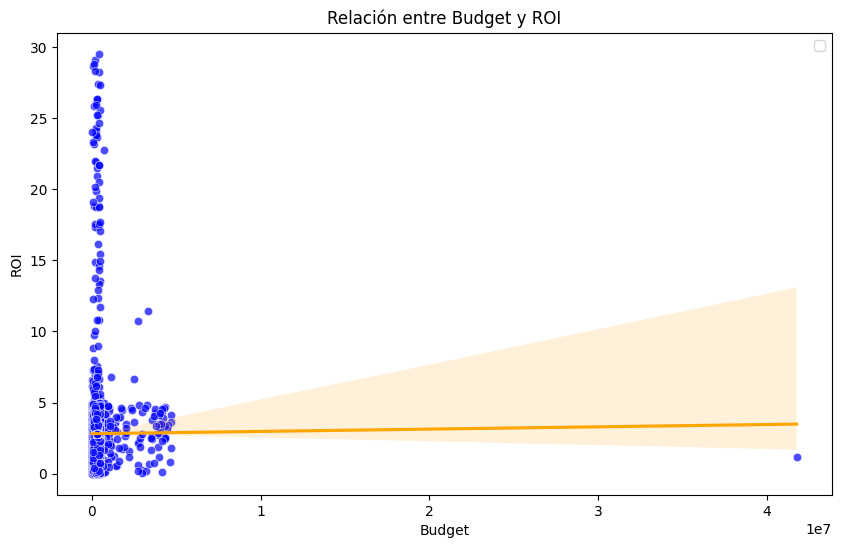

In [66]:
# Gráfico de dispersión: Budget vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Budget', y='ROI', color='blue', alpha=0.7)

# Ajustar el título y las etiquetas
plt.title('Relación entre Budget y ROI')
plt.xlabel('Budget')
plt.ylabel('ROI')

# Añadir línea de regresión
sns.regplot(data=df, x='Budget', y='ROI', scatter=False, color='orange', line_kws={"label": "Línea de Regresión"})

# Mostrar leyenda
plt.legend()
plt.show()


La eficiencia parece ser independiente del presupuesto. Esto indica que otros factores, como la estrategia de campaña, tipo de canal, calidad de la segmentación, y efectividad de la ejecución pueden ser más determinantes para el éxito de la campaña que el monto del presupuesto. La ausencia de relación directa entre presupuesto y ROI también podría indicar una oportunidad para mejorar la optimización de la asignación de presupuesto. Redistribuir la inversión hacia campañas y canales que ya muestran altos retornos en comparación con su presupuesto podría aumentar el ROI general.

#### Gráfico de barras. Gastos totales por ingresos totales.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\539189760.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




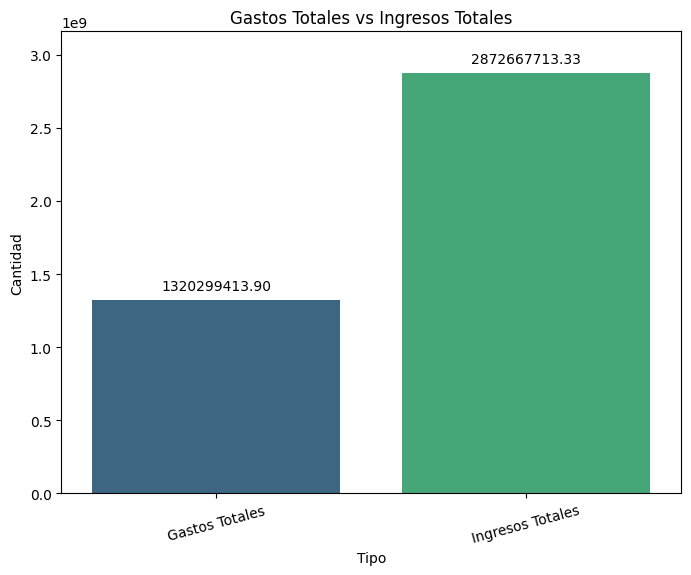

In [67]:
# Asegúrate de que 'Spend' y 'Revenue' estén disponibles y sumarlos para cada campaña
total_gastos = df['Spend'].sum()
total_ingresos = df['Revenue'].sum()

# Crear un DataFrame para los totales
totales = pd.DataFrame({
    'Tipo': ['Gastos Totales', 'Ingresos Totales'],
    'Cantidad': [total_gastos, total_ingresos]
})

# Gráfico de barras para gastos totales vs ingresos totales
plt.figure(figsize=(8, 6))  # Aumenta la altura del gráfico
barplot = sns.barplot(x='Tipo', y='Cantidad', data=totales, palette='viridis')
plt.title('Gastos Totales vs Ingresos Totales')
plt.ylabel('Cantidad')
plt.xlabel('Tipo')
plt.xticks(rotation=15)

# Añadir las cantidades sobre las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.ylim(0, total_ingresos * 1.1)  # Ajusta el límite superior para dar espacio a las etiquetas
plt.show()


La diferencia entre ingresos y gastos indica que hay un margen positivo a nivel general. Esto refleja que las campañas en conjunto están generando retornos. 

#### Gráfico de líneas. Ingresos y gastos a lo largo del tiempo.

In [68]:
import plotly.graph_objects as go

# Agrupar ingresos y gastos por mes
df['month'] = df['Start_Date'].dt.to_period('M')  # Crear una columna de periodo mensual
monthly_summary = df.groupby('month').agg({'Revenue': 'sum', 'Spend': 'sum'}).reset_index()
monthly_summary['month'] = monthly_summary['month'].dt.to_timestamp()  # Convertir de vuelta a timestamp

# Crear el gráfico interactivo y añadir ambas series con nombres específicos
fig = go.Figure()

# Añadir la traza de 'Revenue'
fig.add_scatter(x=monthly_summary['month'], y=monthly_summary['Revenue'], mode='lines+markers', name='Revenue')

# Añadir la traza de 'Spend'
fig.add_scatter(x=monthly_summary['month'], y=monthly_summary['Spend'], mode='lines+markers', name='Spend')

# Configuración del título y las etiquetas
fig.update_layout(
    title='Ingresos y Gastos a lo Largo del Tiempo',
    xaxis_title='Fecha',
    yaxis_title='Monto',
    xaxis_tickformat='%Y-%m'
)

fig.show()

#### Gráfico pastel. Campañas por Región y Región por ROI.

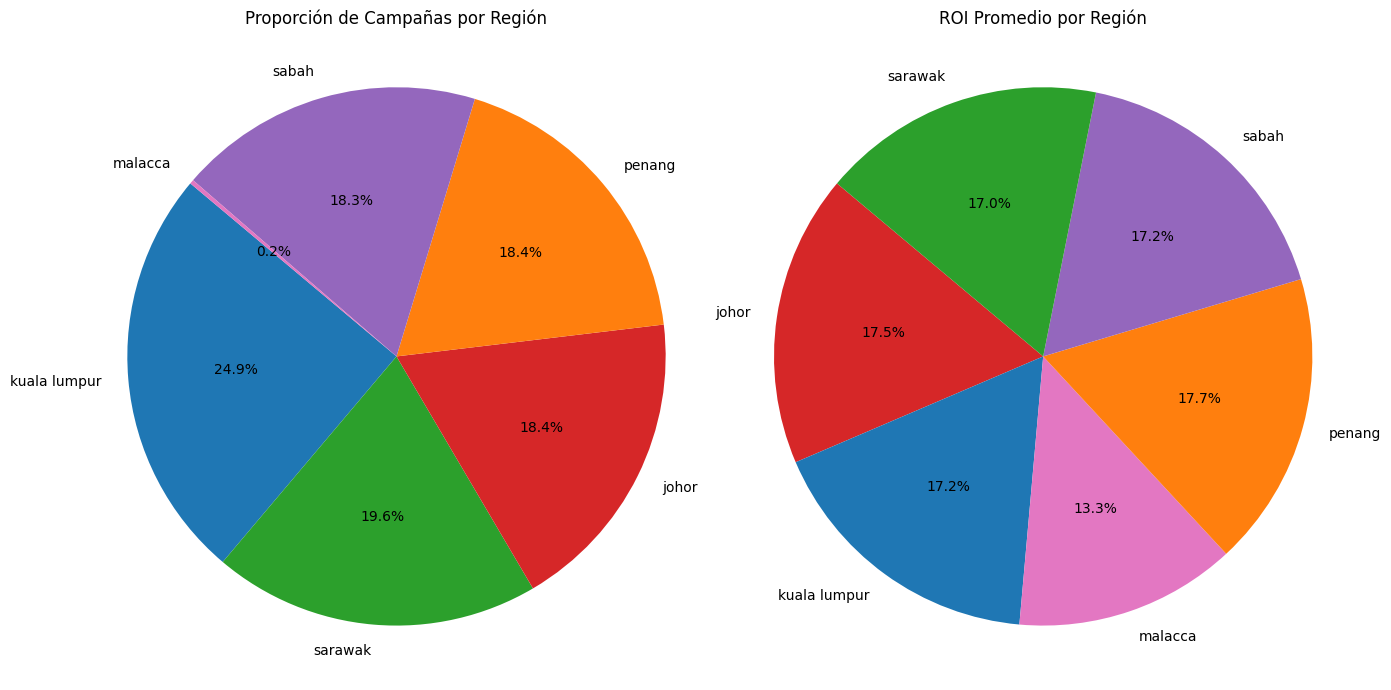

In [69]:
# Calcular el número de campañas por región
campaigns_by_region = df['Region'].value_counts()

# Calcular el ROI promedio por región
roi_by_region = df.groupby('Region')['ROI'].mean()

# Definir colores para cada región
colors = {
    'kuala lumpur': '#1f77b4',  # azul
    'penang': '#ff7f0e',         # naranja
    'sarawak': '#2ca02c',        # verde
    'johor': '#d62728',          # rojo
    'sabah': '#9467bd',          # púrpura
    'malacca': '#e377c2'
}

# Configuración del gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de pastel para la proporción de campañas por región
axes[0].pie(campaigns_by_region,
             labels=campaigns_by_region.index,
             autopct='%1.1f%%',
             startangle=140,
             colors=[colors[region] for region in campaigns_by_region.index])
axes[0].set_title('Proporción de Campañas por Región')
axes[0].axis('equal')  # Para que el gráfico sea un círculo

# Gráfico de pastel para el ROI promedio por región
axes[1].pie(roi_by_region,
             labels=roi_by_region.index,
             autopct='%1.1f%%',
             startangle=140,
             colors=[colors[region] for region in roi_by_region.index])
axes[1].set_title('ROI Promedio por Región')
axes[1].axis('equal')  # Para que el gráfico sea un círculo

plt.tight_layout()  # Ajustar el diseño para que no se superpongan
plt.show()

#### Gráfico pastel. Campañas por canal y ROI por canal.

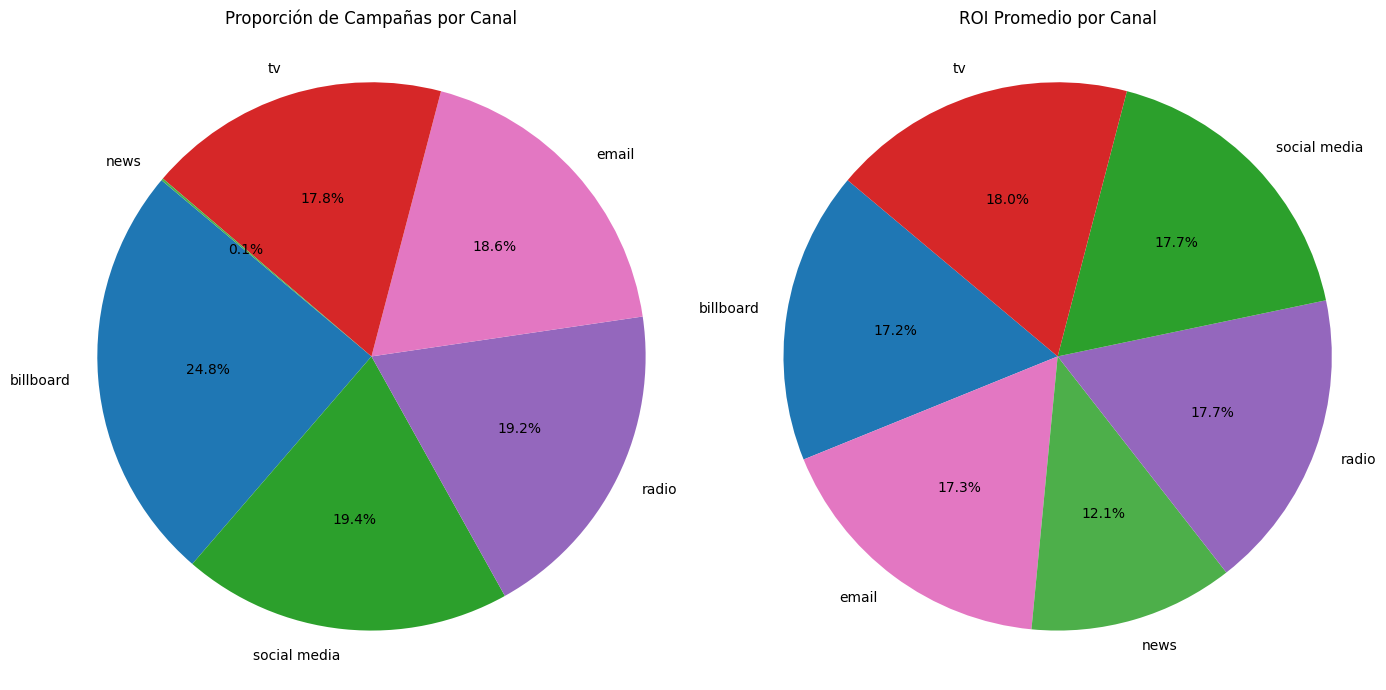

In [70]:
# Calcular el número de campañas por canal
campaigns_by_channel = df['Channel'].value_counts()

# Calcular el ROI promedio por canal
roi_by_channel = df.groupby('Channel')['ROI'].mean()

# Definir colores para cada canal, incluyendo 'email'
colors = {
    'billboard': '#1f77b4',  # azul
    'online': '#ff7f0e',     # naranja
    'social media': '#2ca02c',  # verde
    'tv': '#d62728',         # rojo
    'radio': '#9467bd',      # púrpura
    'email': '#e377c2',       # rosa, or any other color you prefer for 'email'
    'news': '#4daf4a'        # verde oscuro
}

# Configuración del gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de pastel para la proporción de campañas por canal
# Usamos .get() para manejar canales no presentes en 'colors'
axes[0].pie(campaigns_by_channel,
             labels=campaigns_by_channel.index,
             autopct='%1.1f%%',
             startangle=140,
             colors=[colors.get(channel, '#000000') for channel in campaigns_by_channel.index])
             # If channel not in colors, use black '#000000'
axes[0].set_title('Proporción de Campañas por Canal')
axes[0].axis('equal')  # Para que el gráfico sea un círculo

# Gráfico de pastel para el ROI promedio por canal
# Usamos .get() para manejar canales no presentes en 'colors'
axes[1].pie(roi_by_channel,
             labels=roi_by_channel.index,
             autopct='%1.1f%%',
             startangle=140,
             colors=[colors.get(channel, '#000000') for channel in roi_by_channel.index])
             # If channel not in colors, use black '#000000'
axes[1].set_title('ROI Promedio por Canal')
axes[1].axis('equal')  # Para que el gráfico sea un círculo

plt.tight_layout()  # Ajustar el diseño para que no se superpongan
plt.show()

#### Gráfico de barras. Revenue y ROI por canal.

In [71]:
# Calcular el ROI y el Revenue promedio por región
roi_by_canal = df.groupby('Channel')['ROI'].mean().reset_index()
revenue_by_canal = df.groupby('Channel')['Revenue'].mean().reset_index()

# Mostrar el resultado
print(roi_by_canal)
print(revenue_by_canal)

        Channel       ROI
0     billboard  2.768551
1         email  2.783700
2          news  1.938333
3         radio  2.846340
4  social media  2.833674
5            tv  2.882106
        Channel        Revenue
0     billboard  583209.169986
1         email  612504.262468
2          news  526852.333333
3         radio  622051.899080
4  social media  570275.822684
5            tv  597593.896180


C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\28014255.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



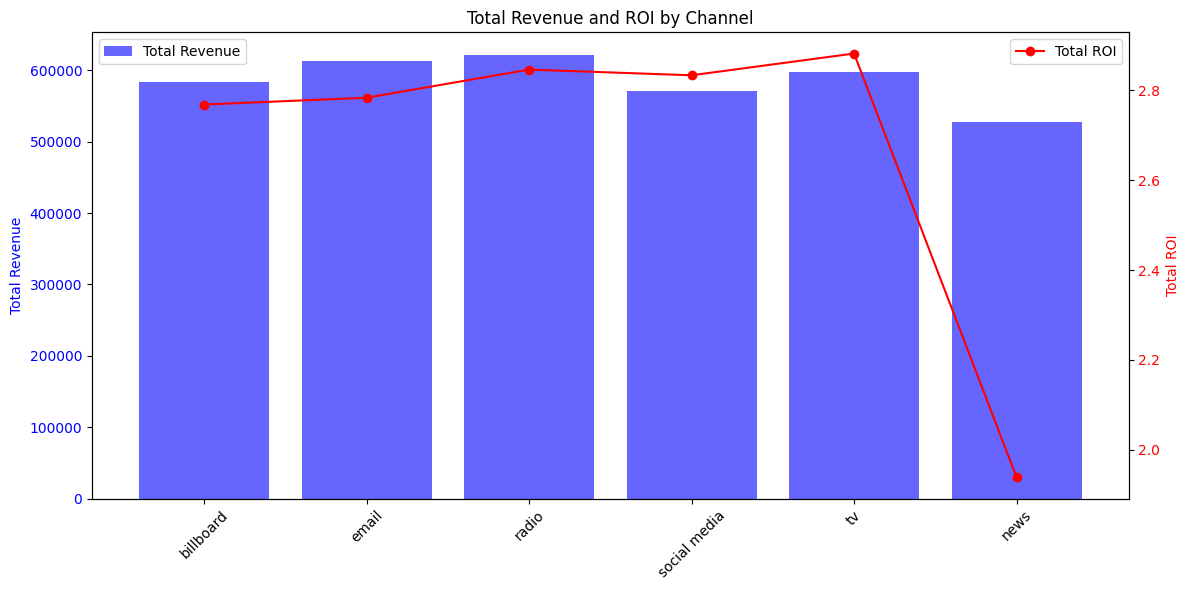

In [72]:
# Datos para el DataFrame
data_roi = {
    'Channel': ['billboard', 'email', 'radio', 'social media', 'tv', 'news'],
    'ROI': [ 2.768551, 2.783700, 2.846340, 2.833674, 2.882106, 1.938333]
}
df_roi = pd.DataFrame(data_roi)

data_revenue = {
    'Channel': ['billboard', 'email', 'radio', 'social media', 'tv', 'news'],
    'Revenue': [583209, 612504, 622051, 570275, 597593, 526852]
}
df_revenue = pd.DataFrame(data_revenue)

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot para Revenue
ax1.bar(df_revenue['Channel'], df_revenue['Revenue'], color='b', alpha=0.6, label='Total Revenue')
ax1.set_ylabel('Total Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(df_revenue['Channel'], rotation=45)

# Crear un segundo eje y para el ROI
ax2 = ax1.twinx()
ax2.plot(df_roi['Channel'], df_roi['ROI'], color='r', marker='o', label='Total ROI')
ax2.set_ylabel('Total ROI', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos y leyendas
plt.title('Total Revenue and ROI by Channel')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()  # Ajustar el diseño para que no se superpongan
plt.show()

Es probable que unas pocas campañas en "news" hayan sido extremadamente rentables y hayan elevado el ROI relativo, pero no de manera consistente en todas las campañas de ese canal. Esto podría significar que cuando "news" funciona bien, genera retornos importantes, aunque en general no es un canal de alto rendimiento.

#### Rentabilidad de las Inversiones

In [73]:
def categorize_roi(roi):
    if roi > 1:
        return 'Rentable'
    else:
        return 'No Rentable'

df['ROI_Category'] = df['ROI'].apply(categorize_roi)

In [74]:
# Contar la cantidad de inversiones en cada categoría
roi_counts = df['ROI_Category'].value_counts().reset_index()
roi_counts.columns = ['ROI_Category', 'Count']

# Crear el gráfico de barras
fig = px.bar(roi_counts, x='ROI_Category', y='Count',
             title='Rentabilidad de las Inversiones',
             labels={'ROI_Category': 'Categoría de ROI', 'Count': 'Cantidad de Inversiones'},
             color='ROI_Category',
             color_discrete_map={'Rentable': 'green', 'Roto Incluso': 'blue', 'No Rentable': 'red'})

# Mostrar el gráfico
fig.show()

Con aproximadamente un 82.8% de campañas rentables, esto muestra que la estrategia de inversión es en gran medida efectiva. Sin embargo, el 17.2% de campañas no rentables representa una oportunidad para revisar qué factores contribuyen al bajo rendimiento en esos casos.

ROI por Grupo de Inversión

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\1608686730.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




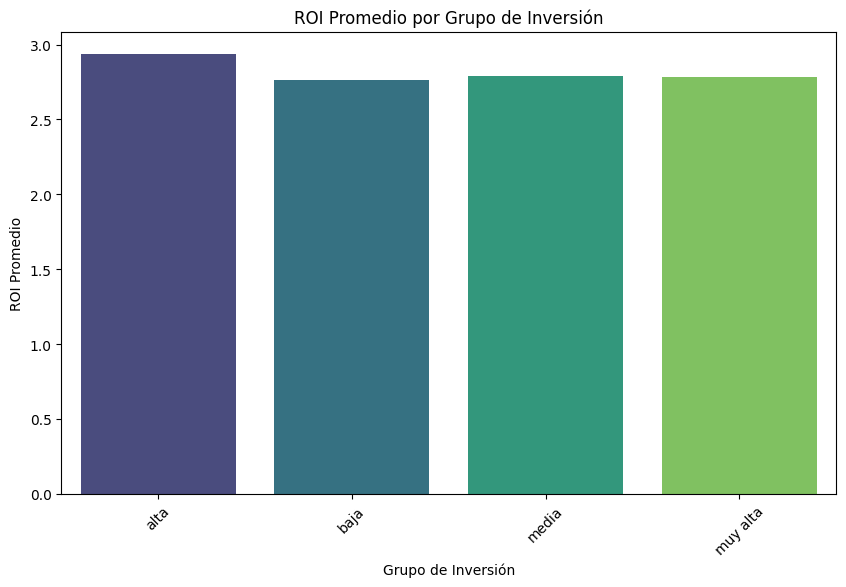

In [75]:
roi_by_grupo = df.groupby('Grupos_de_inversión')['ROI'].mean().reset_index()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Grupos_de_inversión', y='ROI', data=roi_by_grupo, palette='viridis')
plt.title('ROI Promedio por Grupo de Inversión')
plt.xlabel('Grupo de Inversión')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.show()

Conversiones por Grupo_de_inversión

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\2204541905.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




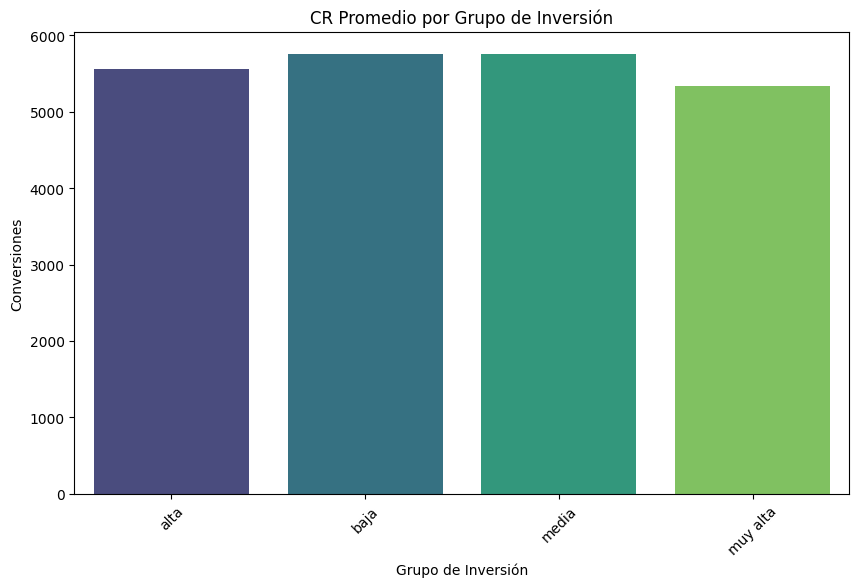

In [76]:
# Agrupar por 'Grupos_de_inversión' y calcular el CR promedio
cr_by_grupo = df.groupby('Grupos_de_inversión')['Conversions'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Grupos_de_inversión', y='Conversions', data=cr_by_grupo, palette='viridis')
plt.title('CR Promedio por Grupo de Inversión')
plt.xlabel('Grupo de Inversión')
plt.ylabel('Conversiones')
plt.xticks(rotation=45)
plt.show()

### Gastos por canal y región.

In [77]:
fig = px.bar(df, x='Channel', y='Spend', color='Region', barmode='stack',
             title='Gastos por Canal y Región',
             labels={'Channel': 'Canal', 'Spend': 'Gastos', 'Region': 'Región'})

# Mostrar el gráfico
fig.show()

### 7. Interpretación y conclusiones.

**Conclusiones del Análisis de Campañas de Marketing**

---

#### 1. **Desempeño por Canal de Marketing**

**Uso de Canales**: Billboard es el canal más utilizado, seguido de social media y radio. El canal de noticias (news) tiene la menor utilización, con solo un 0,1% de las campañas.

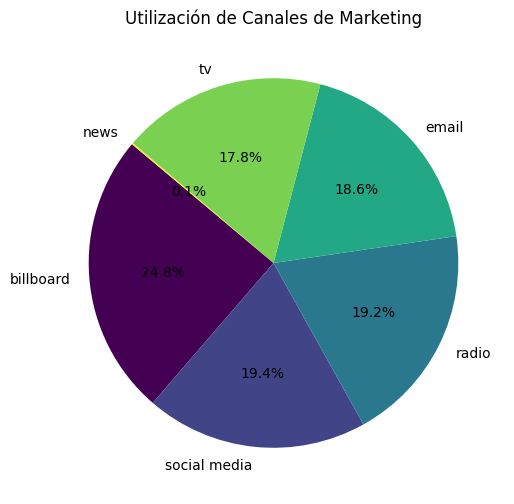

In [78]:
channel_counts = df['Channel'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(channel_counts)))
plt.figure(figsize=(10, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Utilización de Canales de Marketing')
plt.show()

**Retorno de Inversión (ROI)**: Aunque el canal de noticias tiene un ROI bajo debido a sus altos costos, el canal de TV muestra el ROI más alto de todos los canales analizados.

In [100]:
roi_by_channel = df.groupby('Channel')['ROI'].mean().reset_index()
fig = px.bar(roi_by_channel, 
             x='Channel', 
             y='ROI', 
             title='Retorno de Inversión (ROI) por Canal de Marketing',
             labels={'Channel': 'Canal', 'ROI': 'ROI Promedio'},
             color='ROI',  # Color basado en los valores de ROI
             color_continuous_scale='viridis')  # Escala de colores

fig.show()

**Tasa de Conversión (CR)**: Las mayores tasas de conversión se observan en los canales de noticias y email, destacando especialmente la eficacia de estos canales para captar clientes.

In [106]:
import plotly.graph_objects as go

# Calcular la tasa de conversión promedio, clics e impresiones por canal
cr_by_channel = df.groupby('Channel').agg({'CR': 'mean', 'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()

# Convertir CR a porcentaje
cr_by_channel['CR'] = cr_by_channel['CR'] * 100

# Crear el gráfico de barras
fig = go.Figure()

# Añadir la barra para la tasa de conversión
fig.add_trace(go.Bar(
    x=cr_by_channel['Channel'],
    y=cr_by_channel['CR'],
    name='Tasa de Conversión (%)',
    marker_color='lightblue'
))

# Añadir la línea para los clics
fig.add_trace(go.Scatter(
    x=cr_by_channel['Channel'],
    y=cr_by_channel['Clicks'],
    name='Cantidad de Clicks',
    mode='lines+markers',
    marker=dict(color='orange'),
    yaxis='y2'  # Usar un segundo eje para los clics
))

# Añadir la línea para las impresiones
fig.add_trace(go.Scatter(
    x=cr_by_channel['Channel'],
    y=cr_by_channel['Impressions'],
    name='Cantidad de Impresiones',
    mode='lines+markers',
    marker=dict(color='green'),
    yaxis='y2'  # Usar un segundo eje para las impresiones
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Tasa de Conversión (CR), Clics e Impresiones por Canal de Marketing',
    xaxis_title='Canal',
    yaxis_title='Tasa de Conversión Promedio (CR) (%)',
    yaxis2=dict(
        title='Cantidad',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1),
    barmode='group',
    height=600
)

# Mostrar el gráfico
fig.show()

#### 2. **Desempeño por Categoría de Producto**

**Ventas**: Los productos electrónicos lideran las ventas, seguidos por categorías de moda y comestibles.

In [81]:
sales_by_category = df.groupby('Product_Category')['Revenue'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by='Revenue', ascending=False)
fig = px.bar(sales_by_category, x='Product_Category', y='Revenue',
             title='Ventas por Categoría de Producto',
             labels={'Product_Category': 'Categoría de Producto', 'Revenue': 'Ventas Totales (Revenue)'},
             color='Product_Category',  # Añadir color por categoría
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

**Tasa de Conversión (CR)**: Las campañas en la categoría de moda tienen la tasa de conversión más alta, seguidas por comestibles, Pero es en los productos electrónicos donde vemos un mayor número de clicks y de impresiones.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\106738008.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\106738008.py:28: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\106738008.py:29: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\jorge\AppData\Local\Temp\ipykernel_30656\106738008.py:30: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



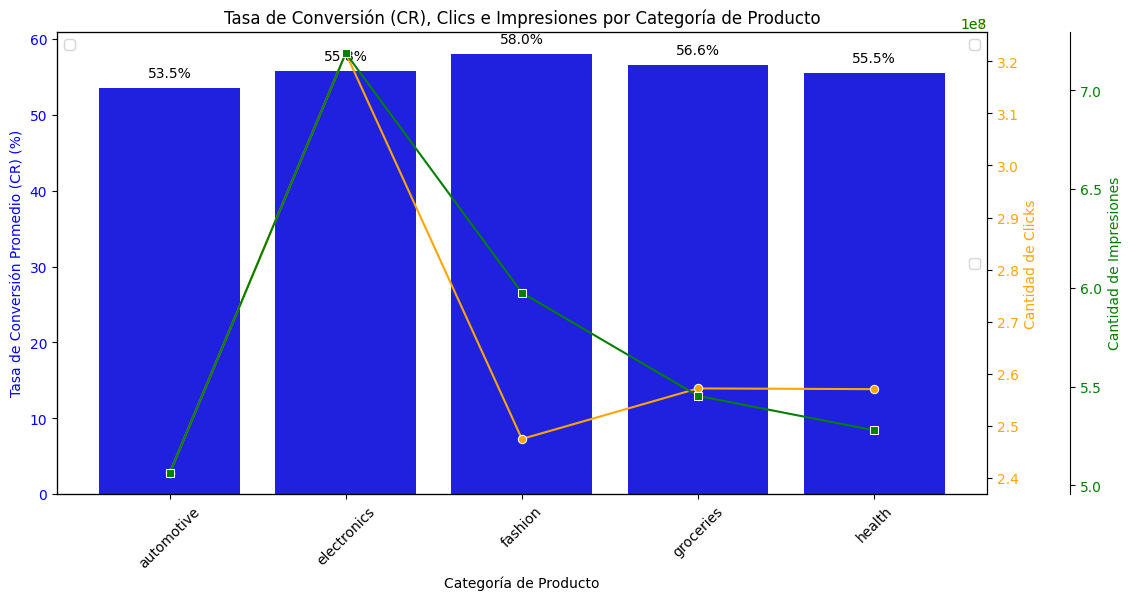

In [97]:

cr_by_category = df.groupby('Product_Category').agg({'CR': 'mean', 'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()
cr_by_category['CR'] = cr_by_category['CR'] * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(data=cr_by_category, x='Product_Category', y='CR', ax=ax1, color='b')
ax1.set_ylabel('Tasa de Conversión Promedio (CR) (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(data=cr_by_category, x='Product_Category', y='Clicks', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Cantidad de Clicks', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje un poco hacia afuera
sns.lineplot(data=cr_by_category, x='Product_Category', y='Impressions', ax=ax3, color='green', marker='s')
ax3.set_ylabel('Cantidad de Impresiones', color='green')
ax3.tick_params(axis='y', labelcolor='green')

for index, value in enumerate(cr_by_category['CR']):
    ax1.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom')

ax1.set_title('Tasa de Conversión (CR), Clics e Impresiones por Categoría de Producto')
ax1.set_xlabel('Categoría de Producto')
ax1.set_xticklabels(cr_by_category['Product_Category'], rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

plt.show()

**Revenue**: Las categorías de electrónica y comestibles generan los mayores ingresos, lo que resalta su rentabilidad.

In [98]:
revenue_by_category = df.groupby('Product_Category')['Revenue'].sum().reset_index()
revenue_by_category = revenue_by_category.sort_values(by='Revenue', ascending=False)
fig = px.bar(revenue_by_category, x='Product_Category', y='Revenue',
             title='Ingresos por Categoría de Producto',
             labels={'Product_Category': 'Categoría de Producto', 'Revenue': 'Ingresos Totales (Revenue)'},
             color='Product_Category',  # Añadir color por categoría
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

#### 3. **Desempeño Geográfico**

**Revenue**: Sarawak y Johor sobresalen en ingresos, reflejando un desempeño fuerte en estas áreas.

In [84]:
coordinates = {
    'kuala lumpur': {'lat': 3.1390, 'lon': 101.6869},
    'penang': {'lat': 5.4164, 'lon': 100.3327},
    'sarawak': {'lat': 1.5533, 'lon': 110.3592},
    'johor': {'lat': 1.4927, 'lon': 103.7414},
    'sabah': {'lat': 5.9804, 'lon': 116.0735},
    'malacca': {'lat': 2.1898, 'lon': 102.2501}  
}

df1['Latitude'] = df1['Region'].apply(lambda x: coordinates[x]['lat'])
df1['Longitude'] = df1['Region'].apply(lambda x: coordinates[x]['lon'])

In [85]:
fig = px.scatter_geo(df1,
                     lat='Latitude',
                     lon='Longitude',
                     text='Region',
                     size='Revenue',
                     color='Revenue',
                     hover_name='Region',
                     projection='natural earth',
                     title='Mapa Geográfico de Rendimiento por Región (Revenue)')

fig.show()

   - **Volumen de Campañas**: Kuala Lumpur lidera en número de campañas, mientras que el segmento de mercado "high" presenta el mayor volumen de campañas entre todos los segmentos.
   - **Budget**: Las regiones de Sarawak y Penang reciben las mayores asignaciones de presupuesto, mientras que Malacca y News muestran un ROI bajo debido a sus altos costos de inversión.

In [86]:
campaigns_by_region = df['Region'].value_counts().reset_index()
campaigns_by_region.columns = ['Region', 'Number_of_Campaigns']

budget_by_region = df.groupby('Region')['Budget'].sum().reset_index()

combined_data = pd.merge(campaigns_by_region, budget_by_region, on='Region')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=combined_data['Region'],
    y=combined_data['Number_of_Campaigns'],
    name='Número de Campañas',
    marker_color='indianred'
))


fig.add_trace(go.Scatter(
    x=combined_data['Region'],
    y=combined_data['Budget'],
    name='Presupuesto (Budget)',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='blue')
))


fig.update_layout(
    title='Número de Campañas y Presupuesto por Región',
    xaxis=dict(title='Región'),
    yaxis=dict(title='Número de Campañas'),
    yaxis2=dict(title='Presupuesto (Budget)', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1, orientation='h')
)

fig.show()

#### 4. **Relación entre Variables Financieras**

  - **Ingresos y Gastos**: El total de ingresos es más del doble del total de gastos, con un 82.8% de campañas rentables (3,989 de 4,819) frente a un 17.2% de campañas no rentables.

In [87]:
total_campaigns = len(df)
profitable_campaigns = len(df[df['ROI'] > 1])
non_profitable_campaigns = total_campaigns - profitable_campaigns

campaigns = pd.DataFrame({
    'Category': ['Rentables', 'No Rentables'],
    'Count': [profitable_campaigns, non_profitable_campaigns]
})

fig = px.pie(campaigns, values='Count', names='Category',
             title='Proporción de Campañas Rentables y No Rentables',
             color='Category',  
             color_discrete_map={'Rentables': 'green', 'No Rentables': 'red'},
             hole=0.3) 

fig.show()

**Recomendaciones Futuras para Estrategias de Marketing**

---

1. **Ajustar Inversiones según el Canal**:
   - **Priorizar Canales Rentables**: Dado el alto ROI en TV, se recomienda aumentar la inversión en este canal, especialmente si el objetivo es maximizar la rentabilidad.
   - **Evaluar Eficiencia del Canal de Noticias**: Aunque tiene una tasa de conversión alta, el canal de noticias tiene un ROI bajo debido a sus altos costos. Esto indica que es efectivo para atraer clientes, pero la inversión debe ser cuidadosamente medida o limitada a campañas muy específicas donde se espera una alta conversión.
   - **Mantener Inversiones en Email y Radio**: Ambos canales son rentables en términos de revenue, por lo que se recomienda seguir invirtiendo en ellos, optimizando para maximizar conversiones.

2. **Optimizar Estrategias de Producto**:
   - **Aumentar Enfoque en Productos Electrónicos y Moda**: Dado su alto revenue, deberían mantenerse campañas fuertes para productos electrónicos. Además, se recomienda expandir las campañas en moda y comestibles, ya que ambas categorías también presentan alta tasa de conversión y revenue.
   - **Diversificación de Productos en Regiones con Alto ROI**: En regiones como Penang, con alto ROI, es recomendable diversificar la oferta de productos, explorando categorías adicionales para maximizar la rentabilidad en un entorno ya favorable.

3. **Segmentación Regional y de Mercado**:
   - **Concentrar Presupuesto en Regiones Rentables**: Penang y Sarawak muestran altos ingresos y ROI. Redirigir parte del presupuesto hacia estas regiones podría mejorar la eficiencia general de las campañas.
   - **Reevaluar Estrategias en Regiones con ROI Bajo**: En áreas como Malacca, donde el ROI es bajo debido a los altos costos, se recomienda optimizar las estrategias o reducir el presupuesto, enfocando solo en campañas que hayan demostrado ser altamente efectivas.
   - **Aumentar Segmentación en el Market Segment High**: Como es el segmento con más campañas, una segmentación más fina dentro de este grupo podría ayudar a mejorar aún más las conversiones y el retorno de inversión.

4. **Estrategias de Control de Presupuesto**:
   - **Reevaluar Presupuesto en Campañas con ROI Consistentemente Bajo**: Dado que no se observó una relación directa entre el budget y el ROI, se recomienda una evaluación constante de campañas con presupuestos altos y ROI bajo, para redistribuir fondos a campañas con mayores retornos.
   - **Invertir en Años Clave**: A partir de 2023 se observa un aumento en ingresos. Este incremento podría estar relacionado con estrategias más efectivas o una respuesta positiva del mercado, por lo que se recomienda una mayor inversión en años de alto rendimiento esperado.